<img src="logo-cefet.png" width="300">

<h1> PPCIC Dissertação - 2021/2022
    <br>
    <br>
    DETECÇÃO DE EVENTOS ADVERSOS ATRAVÉS DO TWITTER UTILIZANDO O METAMAP PARA O PORTUGUÊS DO BRASIL </h1>
</br>

<h2> Matéria: CIC1229 - TÓPICOS ESPECIAIS EM ALGORITMOS </h2>
<h2> Aluno: Perciliano </h2>
<h2> Orientadora: Kele Belloze </h2>
<h3> Data: 13/06/2022 </h3>

---

**Autor: Luiz Perciliano** - 
***luiz.perciliano@eic.cefet-rj.br***


<b>Dados da pesquisa na base SCOPUS (541) e PubMed (188) - 729 documentos para análise</b>

**A Fazer**

1. [x] Criado projeto no git para Fork e acompanhamento do Will
1. [ ] 6+ - Há um documento que não foi necessário baixar PDF, verificar este
1. [ ] Ler novos documentos de 2022
1. [ ] Analisr biblioteca Python do MetaMap
1. [ ] Ajustar documento / manual de instalação do Metamap
1. [ ] Documentos sem abstract serão deixados por último
1. [ ] Melhorar busca de massa de dados no Twitter com o Knime
1. [ ] Ajustar / rodar MetaMap com nova massa de dados

---

[Projeto no GitHub](https://github.com/LuizPerciliano/Evento-Adverso-com-Metamap-e-Twitter-com-Portugues-Brasil)

[Site da dissertação](https://www.overleaf.com/read/rtybccmfvfr7)

[Manual de instalação do Metamap DFB 2021](https://www.overleaf.com/read/jsyhtqwwgccz)

# Preparar Infraesrtutura

In [1]:
print(f'Importar as bibliotecas necessárias e mapear a pasta do projeto.')
import os, re
import sys
import pandas as pd
import datetime
#import numpy as np
import seaborn as sns

import nltk
#nltk.download()
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

from google_trans_new import google_translator

from bs4 import BeautifulSoup
from bs4.formatter import HTMLFormatter
import requests

Importar as bibliotecas necessárias e mapear a pasta do projeto.


In [2]:
data_inicio = pd.Timestamp.now()
print(f'Iniciando o programa em: {data_inicio}')

Iniciando o programa em: 2022-06-25 02:19:53.695946


## Verificar, atualizar e instalar se necessário python e módulos

In [ ]:
## versao 3,9,0 estava funcionando
print('Local de instalação do Python:       ',sys.executable)
print('Versão do Python instalado e em uso: ',sys.version)
print('Informações da versão do Python:     ',sys.version_info)
print(f'Quantidade de CPU:                   {os.cpu_count()}')

In [ ]:
print('Atualizando os módulos Python.')
#!pip install --upgrade pip

In [ ]:
print('Instalando os módulos necessários.')
# print('')
#!pip install Unidecode -q
#!pip install sklearn
#!pip install wordcloud
#!pip install wget
#!pip install opencv-python #import cv2
#!pip install wand #wand=0.6.5
#!pip install jupyter_contrib_nbextensions
#!pip install pip-chill ## para verificar todos os mõdulos instalados para uma nova instalacao

In [3]:
print(f'Lista do conteúdo da pasta ...')
os.listdir(os.path.join('..','data'))

Lista do conteúdo da pasta ...


['base-qualis-06-06-2021.xlsx',
 'bases_filtradas-completa-14-06-2022.xlsx',
 'bases_filtradas-completa-25-06-2022.xlsx',
 'bases_filtradas-resumida-14-06-2022.xlsx',
 'bases_filtradas-resumida-25-06-2022.xlsx',
 'bases_filtradas_traduzida-26-09-2021.xlsx',
 'bkp',
 'pubmed-csv-naturallan-set-2022.csv',
 'pubmed.csv',
 'PubMed_Timeline_Results_by_Year-10-06-2021.csv',
 'requiremets.txt',
 'resultado_pubmed-25-06-22.xlsx',
 'resultado_scopus-24-06-2022.xlsx',
 'scopus-31-05-2022.csv',
 'scopus.csv',
 'stop_word_projeto.csv',
 'stop_word_pt.csv']

In [4]:
pd.set_option("max_colwidth", 200)

# Carga - Base Qualis

# Carga - Base Scopus

In [5]:
print('Visualização do dataframe carregado da base scopus.')
arquivo_base_scopus = os.path.join('../data','scopus-31-05-2022.csv')
raw_data_scopus = pd.read_csv(arquivo_base_scopus, sep=",", delimiter=None, encoding='utf-8')
raw_data_scopus.head(3)

Visualização do dataframe carregado da base scopus.


,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Aronson A.R.,17933416200;,Effective mapping of biomedical text to the UMLS Metathesaurus: the MetaMap program.,2001,Proceedings / AMIA ... Annual Symposium. AMIA Symposium,NaN,NaN,NaN,17,21,...,NaN,NaN,11825149.0,English,Proc AMIA Symp,Article,Final,NaN,Scopus,2-s2.0-0035752429
1,"Kuhn M., Letunic I., Jensen L.J., Bork P.",35345083400;6602771600;35548941900;7103061421;,The SIDER database of drugs and side effects,2016,Nucleic Acids Research,44,D1,NaN,D1075,D1079,...,NaN,NARHA,26481350.0,English,Nucleic Acids Res.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-84979503522
2,"Nikfarjam A., Sarker A., O'Connor k., Ginn R., Gonzalez G.",36069663700;36976315000;56596185000;56596524300;56749066000;,Pharmacovigilance from social media: Mining adverse drug reaction mentions using sequence labeling with word embedding cluster features,2015,Journal of the American Medical Informatics Association,22,3,NaN,671,681,...,NaN,JAMAF,25755127.0,English,J. Am. Med. Informatics Assoc.,Article,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-84927943705


## Análise base SCOPUS

### Colunas, dados nulos e tipos de dados

In [6]:
print('Verificando colunas, dados nulos e tipos de dados')
raw_data_scopus.info()

Verificando colunas, dados nulos e tipos de dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        541 non-null    object 
 1   Author(s) ID                   541 non-null    object 
 2   Title                          541 non-null    object 
 3   Year                           541 non-null    int64  
 4   Source title                   541 non-null    object 
 5   Volume                         454 non-null    object 
 6   Issue                          236 non-null    object 
 7   Art. No.                       145 non-null    object 
 8   Page start                     407 non-null    object 
 9   Page end                       396 non-null    object 
 10  Page count                     3 non-null      float64
 11  Cited by                       454 non-null    float64
 12  

### Quantidade de conteúdo único para cada coluna

In [7]:
print('Verificando quantidade de conteúdo único para cada coluna')
raw_data_scopus.nunique()

Verificando quantidade de conteúdo único para cada coluna


Authors                          525
Author(s) ID                     521
Title                            539
Year                              23
Source title                     196
Volume                           188
Issue                             37
Art. No.                         141
Page start                       316
Page end                         325
Page count                         3
Cited by                          81
DOI                              442
Link                             541
Affiliations                     528
Authors with affiliations        536
Abstract                         530
Author Keywords                  375
Index Keywords                   492
Molecular Sequence Numbers         0
Chemicals/CAS                     85
Tradenames                        18
Manufacturers                      2
Funding Details                  259
Funding Text 1                   247
Funding Text 2                    29
Funding Text 3                     3
F

### Quantidade de conteúdo nulo para cada coluna

In [8]:
raw_data_scopus.isnull().sum()

Authors                            0
Author(s) ID                       0
Title                              0
Year                               0
Source title                       0
Volume                            87
Issue                            305
Art. No.                         396
Page start                       134
Page end                         145
Page count                       538
Cited by                          87
DOI                               99
Link                               0
Affiliations                       4
Authors with affiliations          3
Abstract                           0
Author Keywords                  166
Index Keywords                    49
Molecular Sequence Numbers       541
Chemicals/CAS                    424
Tradenames                       521
Manufacturers                    539
Funding Details                  267
Funding Text 1                   293
Funding Text 2                   512
Funding Text 3                   538
F

### Resumo Estatístico de Campos Numéricos

In [9]:
raw_data_scopus[['Year','Page count','Cited by']].describe()

,Year,Page count,Cited by
count,541.000000,3.000000,454.000000
mean,2016.147874,651.000000,24.984581
std,4.450171,762.055772,74.734156
min,1992.000000,11.000000,1.000000
25%,2014.000000,229.500000,3.000000
50%,2017.000000,448.000000,10.000000
75%,2020.000000,971.000000,25.000000
max,2022.000000,1494.000000,1339.000000


## Manutenção de dados

In [10]:
# Copiar dataframe para ajustes
df_scopus = raw_data_scopus.copy()

In [11]:
## Verificar se os dataframes nao são espelhos, ou seja, o mesmo df
print(id(df_scopus),id(raw_data_scopus))

3029452554096 3029452544976


In [12]:
print('Listar colunas')
df_scopus.columns

Listar colunas


Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Molecular Sequence Numbers',
       'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details',
       'Funding Text 1', 'Funding Text 2', 'Funding Text 3', 'Funding Text 4',
       'Funding Text 5', 'Funding Text 6', 'Funding Text 7', 'Funding Text 8',
       'Funding Text 9', 'Funding Text 10', 'References',
       'Correspondence Address', 'Editors', 'Sponsors', 'Publisher',
       'Conference name', 'Conference date', 'Conference location',
       'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')

### Ajustar nome das Colunas

In [13]:
columns_scopus = {
    'Authors':'autores_scopus',
    'Author(s) ID':'id_autores',
    'Title':'titulo_documento',
    'Year':'ano',
    'Source title':'titulo_fonte',
    'Volume':'volume',
    'Issue':'publicado',
    'Art. No.':'numero_documento',
    'Page start':'inicio_pagina',
    'Page end':'fim_pagina', 
    'Page count':'quantidade_paginas',
    'Cited by':'quantidade_citacoes',
    'DOI':'doi_scopus',
    'Link':'link_scopus',
    'Affiliations':'afiliacoes',
    'Authors with affiliations':'autores_com_filiacoes',
    'Abstract':'resumo',
    'Author Keywords':'palavras_chaves_autor',
    'Index Keywords':'palavras_chave_index',
    'Molecular Sequence Numbers':'numeros_sequencia_molecular' ,
    'Chemicals/CAS':'chemicals_cas',
    'Tradenames':'nomes_comerciais',
    'Manufacturers':'fabricantes',
    'Funding Details':'detalhes_financiamento',
    'Funding Text 1':'texto_financiamento_1',
    'Funding Text 2':'texto_financiamento_2',
    'Funding Text 3':'texto_financiamento_3',
    'Funding Text 4':'texto_financiamento_4', # do 4 ao 10 são novas colunas
    'Funding Text 5':'texto_financiamento_5',
    'Funding Text 6':'texto_financiamento_6',
    'Funding Text 7':'texto_financiamento_7',
    'Funding Text 8':'texto_financiamento_8',
    'Funding Text 9':'texto_financiamento_9',
    'Funding Text 10':'texto_financiamento_10',
    'References':'referencias',
    'Correspondence Address':'endereco_correspondencia',
    'Editors':'editores',
    'Sponsors':'patrocinadores',
    'Publisher':'editor',
    'Conference name':'nome_conferencia',
    'Conference date':'data_conferencia',
    'Conference location':'local_conferencia',
    'Conference code':'codigo_conferencia',
    'ISSN':'issn_scopus',
    'ISBN':'isbn',
    'CODEN':'coden',
    'PubMed ID':'id_pubmed',
    'Language of Original Document':'idioma_original',
    'Abbreviated Source Title':'titulo_abreviado_fonte',
    'Document Type':'tipo_documento',
    'Publication Stage':'etapa_publicacao',
    'Open Access':'acesso_livre',
    'Source':'fonte',
    'EID':'eid',
}

In [14]:
df_scopus = df_scopus.rename(columns=columns_scopus)
df_scopus.head(1)

,autores_scopus,id_autores,titulo_documento,ano,titulo_fonte,volume,publicado,numero_documento,inicio_pagina,fim_pagina,...,isbn,coden,id_pubmed,idioma_original,titulo_abreviado_fonte,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid
0,Aronson A.R.,17933416200;,Effective mapping of biomedical text to the UMLS Metathesaurus: the MetaMap program.,2001,Proceedings / AMIA ... Annual Symposium. AMIA Symposium,NaN,NaN,NaN,17,21,...,NaN,NaN,11825149.0,English,Proc AMIA Symp,Article,Final,NaN,Scopus,2-s2.0-0035752429


### Criação de colunas

In [15]:
# manter uma coluna padrão, a princípio estes não se repetem e podem ser critério de eliminação de duplicata junto com título
df_scopus["doi"] = df_scopus["doi_scopus"]

In [16]:
# manter uma coluna padraa, a princípio estes não se repetem e podem ser critério de eliminação de duplicata*
df_scopus["titulo_documento_scopus"] = df_scopus["titulo_documento"]

In [17]:
# Criando novas colunas baseadas em antigas para ajustes
df_scopus["inicio_pagina_"] = df_scopus["inicio_pagina"]
df_scopus["fim_pagina_"] = df_scopus["fim_pagina"]

In [18]:
## Expressao que pega só dígitos
r = re.compile(r'\D')

## Criar novas colunas de paginas e + uma para calcular qtde paginas
df_scopus.inicio_pagina_.replace(r, '', regex = True, inplace=True)
df_scopus.fim_pagina_.replace(r, '', regex = True, inplace=True)

### Ajuste de textos de algumas colunas para minúsculo (lower)

In [19]:
## Passar colunas a serem trabalhadas para lower case
df_scopus["titulo_documento"] = df_scopus["titulo_documento"].str.lower()
df_scopus["resumo"] = df_scopus["resumo"].str.lower()
df_scopus["doi"] = df_scopus["doi"].str.lower()

### Remover caracteres especiais

In [20]:
df_scopus.query('eid == "2-s2.0-84901252203" ')

,autores_scopus,id_autores,titulo_documento,ano,titulo_fonte,volume,publicado,numero_documento,inicio_pagina,fim_pagina,...,titulo_abreviado_fonte,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_documento_scopus,inicio_pagina_,fim_pagina_
399,"Culbertson A., Fiszman M., Shin D., Rindflesch T.C.",57170418300;8437484300;55449804300;6601978448;,semantic processing to identify adverse drug event information from black box warnings.,2013,AMIA ... Annual Symposium proceedings / AMIA Symposium. AMIA Symposium,2013,NaN,NaN,266,NaN,...,AMIA Annu Symp Proc,Article,Final,NaN,Scopus,2-s2.0-84901252203,NaN,Semantic processing to identify adverse drug event information from black box warnings.,266,NaN


In [21]:
## Caracateres especiais tem q ficar acima da função limpar
df_scopus["titulo_documento"] = df_scopus["titulo_documento"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|“|”|"|—|•', ' ', x))

In [22]:
df_scopus.query('eid == "2-s2.0-84901252203" ')

,autores_scopus,id_autores,titulo_documento,ano,titulo_fonte,volume,publicado,numero_documento,inicio_pagina,fim_pagina,...,titulo_abreviado_fonte,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_documento_scopus,inicio_pagina_,fim_pagina_
399,"Culbertson A., Fiszman M., Shin D., Rindflesch T.C.",57170418300;8437484300;55449804300;6601978448;,semantic processing to identify adverse drug event information from black box warnings,2013,AMIA ... Annual Symposium proceedings / AMIA Symposium. AMIA Symposium,2013,NaN,NaN,266,NaN,...,AMIA Annu Symp Proc,Article,Final,NaN,Scopus,2-s2.0-84901252203,NaN,Semantic processing to identify adverse drug event information from black box warnings.,266,NaN


In [23]:
def limpar_campo(s):
    return re.sub(r'[\u00a0 .M]', ' ', s)

In [24]:
df_scopus.loc[:,'titulo_documento'] = df_scopus['titulo_documento'].apply(limpar_campo)

In [25]:
df_scopus['titulo_documento'] = df_scopus['titulo_documento'].str.replace('  ', ' ')

In [26]:
df_scopus.query('eid == "2-s2.0-84901252203" ')

,autores_scopus,id_autores,titulo_documento,ano,titulo_fonte,volume,publicado,numero_documento,inicio_pagina,fim_pagina,...,titulo_abreviado_fonte,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_documento_scopus,inicio_pagina_,fim_pagina_
399,"Culbertson A., Fiszman M., Shin D., Rindflesch T.C.",57170418300;8437484300;55449804300;6601978448;,semantic processing to identify adverse drug event information from black box warnings,2013,AMIA ... Annual Symposium proceedings / AMIA Symposium. AMIA Symposium,2013,NaN,NaN,266,NaN,...,AMIA Annu Symp Proc,Article,Final,NaN,Scopus,2-s2.0-84901252203,NaN,Semantic processing to identify adverse drug event information from black box warnings.,266,NaN


### Remoção de espaços de textos de algumas colunas (strip)

In [27]:
## dar strip frente e atras
df_scopus["titulo_documento"] = df_scopus["titulo_documento"].str.strip()
df_scopus["resumo"] = df_scopus["resumo"].str.strip()

### Ajustar tipagem de dados

In [28]:
print('Ajustar tipagem dos dados')
df_scopus['fabricantes'] = df_scopus['fabricantes'].astype('category')
df_scopus['acesso_livre'] = df_scopus['acesso_livre'].astype('category')
df_scopus['idioma_original'] = df_scopus['idioma_original'].astype('category')
df_scopus['etapa_publicacao'] = df_scopus['etapa_publicacao'].astype('category')
df_scopus['fonte'] = df_scopus['fonte'].astype('category')

Ajustar tipagem dos dados


In [29]:
df_scopus['inicio_pagina_'] = df_scopus['inicio_pagina_'].astype('float64')
df_scopus['fim_pagina_'] = df_scopus['fim_pagina_'].astype('float64')

df_scopus['quantidade_paginas_'] = df_scopus['fim_pagina_'] - df_scopus['inicio_pagina_']
df_scopus.sort_values('quantidade_paginas_',ascending=False, )[['issn_scopus','quantidade_paginas_']]

,issn_scopus,quantidade_paginas_
242,22132198,9349.0
56,22132198,6696.0
292,NaN,263.0
518,03029743,131.0
513,18650929,26.0
...,...,...
531,16130073,NaN
534,16130073,NaN
538,03029743,NaN
539,1942597X,NaN


## Exclusão de documentos duplicados

In [30]:
# Ordenando para excluir primeiro as duplicidades
df_scopus = df_scopus.sort_values(['eid','titulo_documento'])
df_scopus[['eid','titulo_documento']]

,eid,titulo_documento
95,2-s2.0-0026721457,development of a questionnaire for detecting potential adverse drug reactions
129,2-s2.0-0034233257,the use of a medical dictionary for regulatory activities terminology (meddra) in prescription event monitoring in japan (j pem)
0,2-s2.0-0035752429,effective mapping of biomedical text to the umls metathesaurus the metamap program
3,2-s2.0-0037353241,detecting adverse events using information technology
63,2-s2.0-0345604428,towards linking patients and clinical information detecting umls concepts in e mail
...,...,...
457,2-s2.0-85129396616,identification of hand foot syndrome from cancer patients’ blog posts bert based deep learning approach to detect potential adverse drug reaction symptoms
468,2-s2.0-85129630760,antipsychotic polypharmacy and adverse drug reactions among adults in a london mental health service 2008 2018
467,2-s2.0-85129638986,on the road to explainable ai in drug drug interactions prediction a systematic review
456,2-s2.0-85130427489,artificial intelligence in pharmacovigilance an introduction to terms concepts applications and limitations


In [31]:
# 4 documentos duplicados
print("Verifica se a coluna em destaque tem duplicados, aparecendo a qtd na direita")
df_scopus.titulo_documento.value_counts()

Verifica se a coluna em destaque tem duplicados, aparecendo a qtd na direita


implementing public health analytical services grid enabling of metamap                                                   2
mkem a multi level knowledge emergence model for mining undiscovered public knowledge                                     2
semantic processing to identify adverse drug event information from black box warnings                                    2
knowledge based biomedical word sense disambiguation an evaluation and application to clinical document classification    2
an exploratory study on pseudo data generation in prescription and adverse drug reaction extraction                       1
                                                                                                                         ..
utilizing text mining on online medical forums to predict label change due to adverse drug reactions                      1
indexing publicly available health data with medical subject headings (mesh) an evaluation of term coverage               1
identify

In [32]:
df_scopus.query('titulo_documento == "implementing public health analytical services grid enabling of metamap" ')[['eid','id_pubmed','quantidade_paginas_','titulo_documento']]

,eid,id_pubmed,quantidade_paginas_,titulo_documento
529,2-s2.0-84889043231,NaN,5.0,implementing public health analytical services grid enabling of metamap
533,2-s2.0-84897097034,NaN,5.0,implementing public health analytical services grid enabling of metamap


In [33]:
## o last exclui a primeira ocorrencia e ou, fica apenas com a última ocorrência
df_scopus = df_scopus.drop_duplicates(['titulo_documento','autores_scopus'], keep='last') ## de 541 para [537 rows x 59 columns]
print(df_scopus)

                                                                                                       autores_scopus  \
95                                                       Corso D.M., Pucino F., DeLeo J.M., Calis K.A., Gallelli J.F.   
129                                                                                Yokotsuka M., Aoyama M., Kubota K.   
0                                                                                                        Aronson A.R.   
3                                         Bates D.W., Evans R.S., Murff H., Stetson P.D., Pizzifferri L., Hripcsak G.   
63                                                                                         Brennan P.F., Aronson A.R.   
..                                                                                                                ...   
457  Nishioka S., Watanabe T., Asano M., Yamamoto T., Kawakami K., Yada S., Aramaki E., Yajima H., Kizaki H., Hori S.   
468                             

In [34]:
df_scopus.query('titulo_documento == "implementing public health analytical services grid enabling of metamap" ')[['eid','id_pubmed','titulo_documento']]

,eid,id_pubmed,titulo_documento
533,2-s2.0-84897097034,NaN,implementing public health analytical services grid enabling of metamap


## Reanalisar dataframe tratado

In [35]:
print('Verificando tipos e se tem dados nulos')
df_scopus.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 95 to 455
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   autores_scopus               537 non-null    object  
 1   id_autores                   537 non-null    object  
 2   titulo_documento             537 non-null    object  
 3   ano                          537 non-null    int64   
 4   titulo_fonte                 537 non-null    object  
 5   volume                       453 non-null    object  
 6   publicado                    236 non-null    object  
 7   numero_documento             143 non-null    object  
 8   inicio_pagina                403 non-null    object  
 9   fim_pagina                   394 non-null    object  
 10  quantidade_paginas           3 non-null      float64 
 11  quantidade_citacoes          452 non-null    float64 
 12  doi_scopus              

In [36]:
df_scopus.nunique()

autores_scopus                 525
id_autores                     521
titulo_documento               537
ano                             23
titulo_fonte                   194
volume                         188
publicado                       37
numero_documento               140
inicio_pagina                  315
fim_pagina                     325
quantidade_paginas               3
quantidade_citacoes             81
doi_scopus                     439
link_scopus                    537
afiliacoes                     526
autores_com_filiacoes          534
resumo                         527
palavras_chaves_autor          373
palavras_chave_index           488
numeros_sequencia_molecular      0
chemicals_cas                   85
nomes_comerciais                18
fabricantes                      2
detalhes_financiamento         259
texto_financiamento_1          247
texto_financiamento_2           29
texto_financiamento_3            3
texto_financiamento_4            0
texto_financiamento_

In [37]:
df_scopus.isnull().sum()

autores_scopus                   0
id_autores                       0
titulo_documento                 0
ano                              0
titulo_fonte                     0
volume                          84
publicado                      301
numero_documento               394
inicio_pagina                  134
fim_pagina                     143
quantidade_paginas             534
quantidade_citacoes             85
doi_scopus                      98
link_scopus                      0
afiliacoes                       4
autores_com_filiacoes            3
resumo                           0
palavras_chaves_autor          164
palavras_chave_index            49
numeros_sequencia_molecular    537
chemicals_cas                  420
nomes_comerciais               517
fabricantes                    535
detalhes_financiamento         263
texto_financiamento_1          289
texto_financiamento_2          508
texto_financiamento_3          534
texto_financiamento_4          537
texto_financiamento_

In [38]:
print('Resumo Estatístico de Campos Numéricos')
#df_scopus.describe()
df_scopus[['ano','quantidade_paginas','quantidade_citacoes','inicio_pagina_','fim_pagina_','quantidade_paginas_' ]].describe()

Resumo Estatístico de Campos Numéricos


,ano,quantidade_paginas,quantidade_citacoes,inicio_pagina_,fim_pagina_,quantidade_paginas_
count,537.000000,3.000000,452.000000,403.000000,394.000000,394.000000
mean,2016.180633,651.000000,25.084071,527.213400,564.340102,49.365482
std,4.448184,762.055772,74.884639,654.300758,892.337338,578.223060
min,1992.000000,11.000000,1.000000,1.000000,2.000000,1.000000
25%,2014.000000,229.500000,3.000000,112.000000,118.250000,4.000000
50%,2017.000000,448.000000,10.000000,333.000000,328.000000,7.000000
75%,2020.000000,971.000000,25.000000,720.000000,687.500000,9.000000
max,2022.000000,1494.000000,1339.000000,6093.000000,10381.000000,9349.000000


### Analisar casos abaixo com resultados do resumo estatístico ****

In [39]:
## qtde de citações
df_scopus.query('quantidade_citacoes > 1000 ')[['eid','quantidade_citacoes','quantidade_paginas','quantidade_paginas_','id_pubmed','titulo_documento']]

,eid,quantidade_citacoes,quantidade_paginas,quantidade_paginas_,id_pubmed,titulo_documento
0,2-s2.0-0035752429,1339.0,NaN,4.0,11825149.0,effective mapping of biomedical text to the umls metathesaurus the metamap program


In [40]:
df_scopus.query('quantidade_paginas > 1000 ')[['eid','quantidade_citacoes','quantidade_paginas','quantidade_paginas_','id_pubmed','titulo_documento']]

,eid,quantidade_citacoes,quantidade_paginas,quantidade_paginas_,id_pubmed,titulo_documento
503,2-s2.0-85087746524,NaN,1494.0,NaN,NaN,studies in health technology and informatics


In [41]:
## qtd de páginas
df_scopus.query('quantidade_paginas_ > 1000 ')[['eid','quantidade_citacoes','quantidade_paginas','quantidade_paginas_','id_pubmed','titulo_documento']]

,eid,quantidade_citacoes,quantidade_paginas,quantidade_paginas_,id_pubmed,titulo_documento
56,2-s2.0-85009726534,42.0,NaN,6696.0,28110055.0,adverse and hypersensitivity reactions to prescription nonsteroidal anti inflammatory agents in a large health care system
242,2-s2.0-85077694717,8.0,NaN,9349.0,31857264.0,natural language processing combined with icd 9 cm codes as a novel method to study the epidemiology of allergic drug reactions


In [42]:
df_scopus.query('quantidade_paginas_ < 4 ')[['eid','quantidade_citacoes','quantidade_paginas','quantidade_paginas_','id_pubmed','titulo_documento']]

,eid,quantidade_citacoes,quantidade_paginas,quantidade_paginas_,id_pubmed,titulo_documento
109,2-s2.0-78149471868,26.0,NaN,3.0,20819859.0,extracting rx information from clinical narrative
73,2-s2.0-78149476739,37.0,NaN,3.0,20819864.0,textractor a hybrid system for medications and reason for their prescription extraction from clinical text documents
84,2-s2.0-78650495544,33.0,NaN,3.0,20962129.0,drug safety surveillance using de identified emr and claims data issues and challenges
402,2-s2.0-79953247617,2.0,NaN,3.0,NaN,towards a better signal detection and knowledge management in pharmacovigilance the vigitermes project [vers une meilleure détection du signal et gestion des connaissances en pharmacovigilance le ...
64,2-s2.0-84859816430,39.0,NaN,2.0,22511681.0,use of administrative data to estimate the incidence of statin related rhabdomyolysis
229,2-s2.0-84875597974,10.0,NaN,2.0,NaN,predicting health patterns using sensor sequence similarity and nlp
530,2-s2.0-84888175735,NaN,NaN,1.0,NaN,in silico analysis of autoimmune diseases and genetic relationships to vaccination against infectious diseases
213,2-s2.0-84889610386,11.0,NaN,3.0,NaN,combining dictionaries and ontologies for drug name recognition in biomedical texts
524,2-s2.0-84943739872,NaN,NaN,1.0,NaN,methods for the detection of drug drug interactions in text
199,2-s2.0-84949322456,12.0,NaN,3.0,26547007.0,pharmacovigilance through the development of text mining and natural language processing techniques


## Visualizações

### Analisando tipos de acessos dos arquivos

In [43]:
## pegar os 10 + patrocinadores
df_scopus.acesso_livre.unique()

[NaN, 'All Open Access, Bronze, Green', 'All Open Access, Bronze', 'All Open Access, Green', 'All Open Access, Gold, Green', 'All Open Access, Hybrid Gold, Green', 'All Open Access, Hybrid Gold', 'All Open Access, Gold']
Categories (7, object): ['All Open Access, Bronze', 'All Open Access, Bronze, Green', 'All Open Access, Gold', 'All Open Access, Gold, Green', 'All Open Access, Green', 'All Open Access, Hybrid Gold', 'All Open Access, Hybrid Gold, Green']

In [44]:
# Groupby by
acesso_livre = df_scopus.groupby("acesso_livre")

# Summary statistic of all
acesso_livre.describe()

ano                                 \
                                    count         mean       std     min   
acesso_livre                                                               
All Open Access, Bronze              24.0  2015.833333  4.390372  2003.0   
All Open Access, Bronze, Green       54.0  2014.759259  3.801366  2003.0   
All Open Access, Gold                 9.0  2020.444444  1.130388  2019.0   
All Open Access, Gold, Green         83.0  2018.072289  3.392183  2006.0   
All Open Access, Green               47.0  2017.340426  3.760646  2005.0   
All Open Access, Hybrid Gold         12.0  2019.416667  2.937480  2014.0   
All Open Access, Hybrid Gold, Green  31.0  2018.064516  2.555197  2011.0   

                                                                      \
                                         25%     50%     75%     max   
acesso_livre                                                           
All Open Access, Bronze              2014.75  2016.5  2019.0  2021.0   
All Open Access, Bronze, Green       2012.25  2014.5  2018.0  2021.0   
All Open Access, Gold                2020.00  2020.0  2021.0  2022.0   
All Open Access, Gold, Green         2017.00  2018.0  2021.0  2022.0   
All Open Access, Green               2016.00  2019.0  2020.0  2022.0   
All Open Access, Hybrid Gold         2018.75  2021.0  2021.0  2022.0   
All Open Access, Hybrid Gold, Green  2015.50  2019.0  2020.0  2021.0   

                                    quantidade_paginas       ... fim_pagina_  \
                                                 count mean  ...         75%   
acesso_livre                                                 ...               
All Open Access, Bronze                            0.0  NaN  ...      398.00   
All Open Access, Bronze, Green                     0.0  NaN  ...      882.25   
All Open Access, Gold                              0.0  NaN  ...     1417.00   
All Open Access, Gold, Green                       0.0  NaN  ...      844.25   
All Open Access, Green                             0.0  NaN  ...      797.75   
All Open Access, Hybrid Gold                       0.0  NaN  ...      976.00   
All Open Access, Hybrid Gold, Green                0.0  NaN  ...      733.00   

                                             quantidade_paginas_              \
                                         max               count        mean   
acesso_livre                                                                   
All Open Access, Bronze               1953.0                19.0    9.842105   
All Open Access, Bronze, Green        1582.0                48.0    7.687500   
All Open Access, Gold                 2123.0                 3.0    9.000000   
All Open Access, Gold, Green          1079.0                 4.0    7.500000   
All Open Access, Green               10381.0                44.0  373.000000   
All Open Access, Hybrid Gold          1245.0                11.0    8.909091   
All Open Access, Hybrid Gold, Green   2607.0                31.0    8.225806   

                                                                          \
                                             std  min   25%   50%    75%   
acesso_livre                                                               
All Open Access, Bronze                 4.072443  3.0  7.00  10.0  12.00   
All Open Access, Bronze, Green          3.748227  2.0  5.75   7.0   9.00   
All Open Access, Gold                   3.464102  5.0  8.00  11.0  11.00   
All Open Access, Gold, Green            4.725816  4.0  4.00   6.0   9.50   
All Open Access, Green               1712.622659  1.0  7.00   8.0  10.25   
All Open Access, Hybrid Gold            4.784444  1.0  6.00   9.0  10.50   
All Open Access, Hybrid Gold, Green     2.499462  2.0  7.00   8.0  10.00   

                                             
                                        max  
acesso_livre                                 
All Open Access, Bronze                18.0  
All Open 

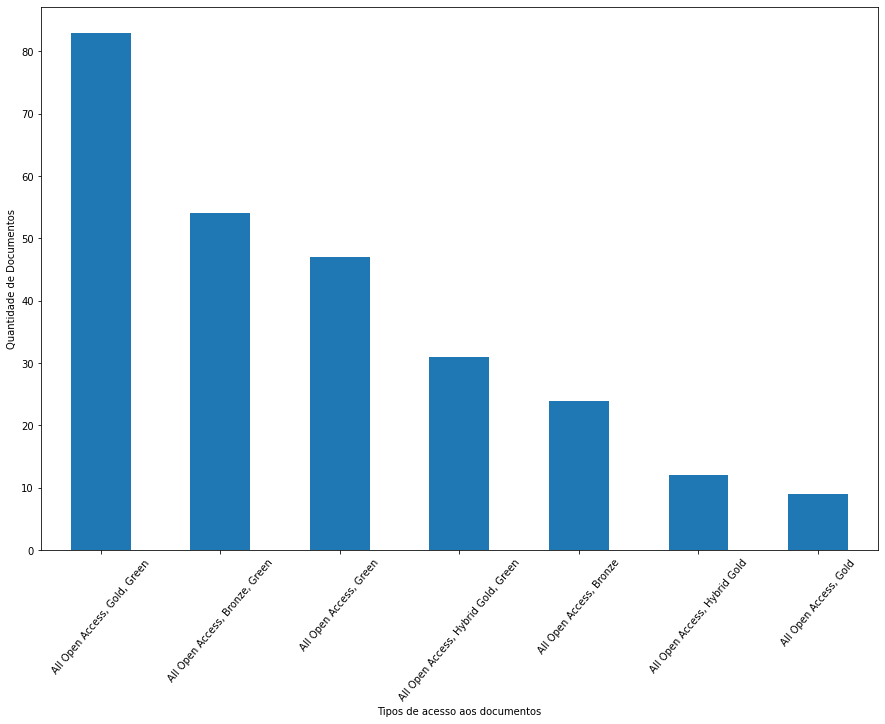

In [45]:
# pegar as 10 +
plt.figure(figsize=(15,10))
acesso_livre.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Tipos de acesso aos documentos")
plt.ylabel("Quantidade de Documentos")
plt.show()

### Analisando tipos de documentos

In [46]:
# Analisando tipos de documentos
# Groupby by
tipo_documento = df_scopus.groupby("tipo_documento")

# Summary statistic of all
tipo_documento.describe()

ano                                                  \
                   count         mean       std     min      25%     50%   
tipo_documento                                                             
Article            328.0  2016.189024  4.865871  1992.0  2014.00  2017.5   
Book                 1.0  2014.000000       NaN  2014.0  2014.00  2014.0   
Book Chapter         8.0  2017.500000  2.878492  2013.0  2015.50  2018.5   
Conference Paper   161.0  2015.813665  3.564065  2005.0  2013.00  2016.0   
Conference Review    3.0  2015.333333  5.686241  2009.0  2013.00  2017.0   
Editorial            4.0  2018.000000  2.160247  2015.0  2017.25  2018.5   
Letter               3.0  2016.333333  3.785939  2012.0  2015.00  2018.0   
Note                 3.0  2018.666667  2.081666  2017.0  2017.50  2018.0   
Review              25.0  2017.480000  4.709211  2003.0  2016.00  2019.0   
Short Survey         1.0  2019.000000       NaN  2019.0  2019.00  2019.0   

                                   quantidade_paginas         ... fim_pagina_  \
                       75%     max              count   mean  ...         75%   
tipo_documento                                                ...               
Article            2020.00  2022.0                0.0    NaN  ...      775.25   
Book               2014.00  2014.0                0.0    NaN  ...      264.00   
Book Chapter       2019.25  2021.0                0.0    NaN  ...      792.25   
Conference Paper   2019.00  2022.0                1.0   11.0  ...      571.00   
Conference Review  2018.50  2020.0                2.0  971.0  ...      132.00   
Editorial          2019.25  2020.0                0.0    NaN  ...      414.25   
Letter             2018.50  2019.0                0.0    NaN  ...     1477.50   
Note               2019.50  2021.0                0.0    NaN  ...      807.50   
Review             2021.00  2022.0                0.0    NaN  ...      671.00   
Short Survey       2019.00  2019.0                0.0    NaN  ...       30.00   

                           quantidade_paginas_                                 \
                       max               count        mean         std    min   
tipo_documento                                                                  
Article            10381.0               216.0   82.675926  779.929255    1.0   
Book                 264.0                 1.0  263.000000         NaN  263.0   
Book Chapter        1111.0                 8.0   11.625000    8.331309    1.0   
Conference Paper    6096.0               141.0    6.390071    3.438798    1.0   
Conference Review    132.0                 1.0  131.000000         NaN  131.0   
Editorial            784.0                 4.0    2.000000    0.816497    1.0   
Letter              1582.0                 3.0    2.000000    0.000000    2.0   
Note                1048.0                 2.0    7.000000    8.485281    1.0   
Review              2607.0                17.0   10.294118    5.676318    4.0   
Short Survey          30.0                 1.0    1.000000         NaN    1.0   

                                                  
                      25%    50%     75%     max  
tipo_documento                                    
Article              6.00    8.0   10.00  9349.0  
Book               263.00  263.0  263.00   263.0  
Book Chapter         6.25   10.0   16.25    24.0  
Conference Paper     4.00    5.0    9.00    26.0  
Conference Review  131.00  131.0  131.00   131.0  
Editorial            1.75    2.0    2.25     3.0  
Letter               2.00    2.0    2.00     2.0  
Note                 4.00    7.0   10.00    13.0  
Review               6.00    9.0   13.00    26.0  
Short Survey         1.00    1.0    1.00     1.0  

[10 rows x 128 columns]

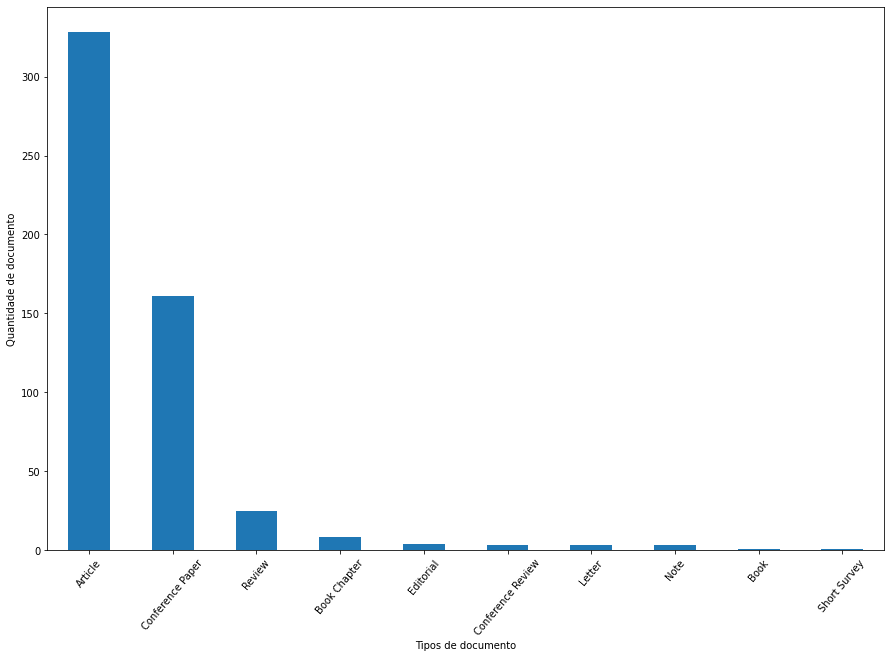

In [47]:
# pegar as 10 +
plt.figure(figsize=(15,10))
tipo_documento.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Tipos de documento")
plt.ylabel("Quantidade de documento")
plt.show()

### Analisando Locais de Conferencia

In [48]:
# Groupby by
local_conferencia = df_scopus.groupby("local_conferencia")

# Summary statistic of all
local_conferencia.describe()

ano                                                       \
                  count    mean  std     min     25%     50%     75%     max   
local_conferencia                                                              
Amsterdam           1.0  2007.0  NaN  2007.0  2007.0  2007.0  2007.0  2007.0   
Arlington, VA       1.0  2010.0  NaN  2010.0  2010.0  2010.0  2010.0  2010.0   
Boston, MA          1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
Brisbane, QLD       1.0  2007.0  NaN  2007.0  2007.0  2007.0  2007.0  2007.0   
Copenhagen          4.0  2013.0  0.0  2013.0  2013.0  2013.0  2013.0  2013.0   
Daejeon             1.0  2008.0  NaN  2008.0  2008.0  2008.0  2008.0  2008.0   
Dallas, TX          1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Gaithersburg, MD    1.0  2011.0  NaN  2011.0  2011.0  2011.0  2011.0  2011.0   
Geneva              1.0  2005.0  NaN  2005.0  2005.0  2005.0  2005.0  2005.0   
Hangzhou            1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Huelva              1.0  2011.0  NaN  2011.0  2011.0  2011.0  2011.0  2011.0   
Jeju                1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
Maastricht          1.0  2006.0  NaN  2006.0  2006.0  2006.0  2006.0  2006.0   
Maui, HI            1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
Niagara Falls, NY   1.0  2010.0  NaN  2010.0  2010.0  2010.0  2010.0  2010.0   
Niagara Falls, ON   1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Oslo                1.0  2011.0  NaN  2011.0  2011.0  2011.0  2011.0  2011.0   
Perth               1.0  2010.0  NaN  2010.0  2010.0  2010.0  2010.0  2010.0   
Philadelphia, PA    1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
Pisa                2.0  2012.0  0.0  2012.0  2012.0  2012.0  2012.0  2012.0   
Saarbrucken         1.0  2009.0  NaN  2009.0  2009.0  2009.0  2009.0  2009.0   
San Francisco, CA   1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Singapore           1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Turin               1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Verona              2.0  2009.0  0.0  2009.0  2009.0  2009.0  2009.0  2009.0   
Wshington, DC       1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   

                  quantidade_paginas         ... fim_pagina_         \
                               count   mean  ...         75%    max   
local_conferencia                            ...                      
Amsterdam                        0.0    NaN  ...      246.00  246.0   
Arlington, VA                    0.0    NaN  ...      496.00  496.0   
Boston, MA                       0.0    NaN  ...       77.00   77.0   
Brisbane, QLD                    0.0    NaN  ...      549.00  549.0   
Copenhagen                       0.0    NaN  ...      628.50  686.0   
Daejeon                          0.0    NaN  ...      353.00  353.0   
Dallas, TX                       0.0    NaN  ...      280.00  280.0   
Gaithersburg, MD                 1.0   11.0  ...         NaN    NaN   
Geneva                           0.0    NaN  ...      828.00  828.0   
Hangzhou                         0.0    NaN  ...      443.00  443.0   
Huelva                           0.0    NaN  ...       74.00   74.0   
Jeju                             0.0    NaN  ...       29.00   29.0   
Maastricht                       0.0    NaN  ...      844.00  844.0   
Maui, HI                         0.0    NaN  ...       32.00   32.0   
Niagara Falls, NY                0.0    NaN  ...      329.00  329.0   
Niagara Falls, ON                0.0    NaN  ...      947.00  947.0   
Oslo                             0.0    NaN  ...      798.00  798.0   
Perth                            0.0    NaN  ...      461.00  461.0   
Philadelphia, PA                 0.0    NaN  ...      950.00  950.0   
Pisa                             0.0    NaN  ...      221.25  239.0   
Saarbrucken                      0.0    NaN  ...      102.00  102.

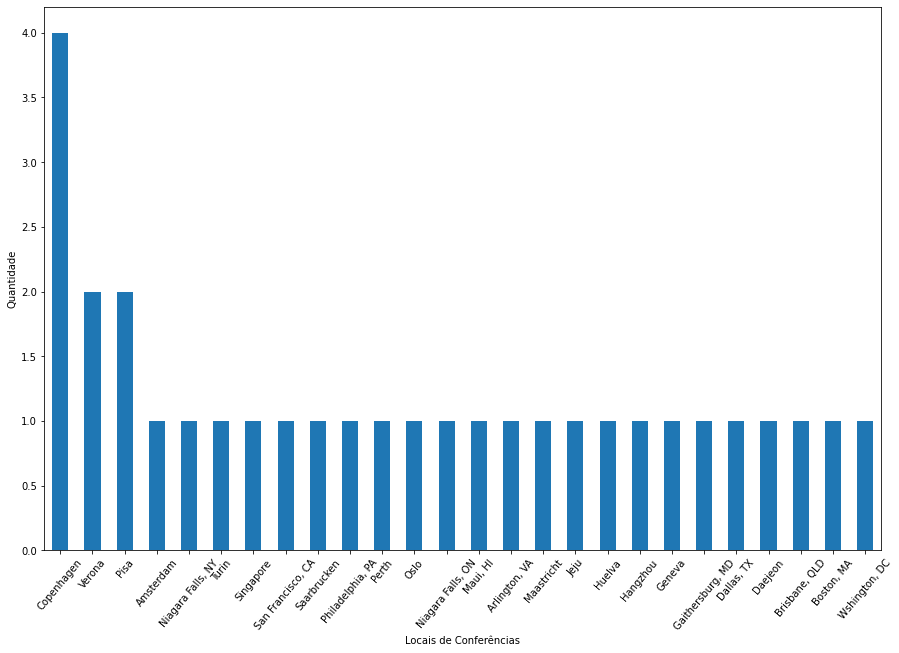

In [49]:
# pegar as 10 +
plt.figure(figsize=(15,10))
local_conferencia.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Locais de Conferências")
plt.ylabel("Quantidade")
plt.show()

### Analisando Editores

In [50]:
# Groupby by
editor = df_scopus.groupby("editor")

# Summary statistic of all
editor.describe()

ano               \
                                                   count         mean   
editor                                                                  
Academic Press Inc.                                 42.0  2016.976190   
Adis                                                 5.0  2020.600000   
American Academy of Allergy, Asthma and Immunology   3.0  2019.333333   
American College of Physicians                       1.0  2017.000000   
American Society of Clinical Oncology                2.0  2020.000000   
...                                                  ...          ...   
Weston Medical Publishing                            1.0  2015.000000   
Wiley-Blackwell Publishing Ltd                       1.0  2018.000000   
World Scientific Publishing Co. Pte Ltd              3.0  2016.666667   
Wuhan University                                     1.0  2016.000000   
eLife Sciences Publications Ltd                      1.0  2017.000000   

                                                                              \
                                                         std     min     25%   
editor                                                                         
Academic Press Inc.                                 3.338527  2003.0  2015.0   
Adis                                                1.140175  2019.0  2020.0   
American Academy of Allergy, Asthma and Immunology  2.081666  2017.0  2018.5   
American College of Physicians                           NaN  2017.0  2017.0   
American Society of Clinical Oncology               0.000000  2020.0  2020.0   
...                                                      ...     ...     ...   
Weston Medical Publishing                                NaN  2015.0  2015.0   
Wiley-Blackwell Publishing Ltd                           NaN  2018.0  2018.0   
World Scientific Publishing Co. Pte Ltd             1.154701  2016.0  2016.0   
Wuhan University                                         NaN  2016.0  2016.0   
eLife Sciences Publications Ltd                          NaN  2017.0  2017.0   

                                                                            \
                                                       50%     75%     max   
editor                                                                       
Academic Press Inc.                                 2017.0  2019.0  2022.0   
Adis                                                2021.0  2021.0  2022.0   
American Academy of Allergy, Asthma and Immunology  2020.0  2020.5  2021.0   
American College of Physicians                      2017.0  2017.0  2017.0   
American Society of Clinical Oncology               2020.0  2020.0  2020.0   
...                                                    ...     ...     ...   
Weston Medical Publishing                           2015.0  2015.0  2015.0   
Wiley-Blackwell Publishing Ltd                      2018.0  2018.0  2018.0   
World Scientific Publishing Co. Pte Ltd             2016.0  2017.0  2018.0   
Wuhan University                                    2016.0  2016.0  2016.0   
eLife Sciences Publications Ltd                     2017.0  2017.0  2017.0   

                                                   quantidade_paginas       \
                                                                count mean   
editor                                                                       
Academic Press Inc.                                               0.0  NaN   
Adis                                                              0.0  NaN   
American Academy of Allergy, Asthma and Immunology                0.0  NaN   
American College of Physicians                                    0.0  NaN   
American Society of Clinical Oncology                             0.0  NaN   
...                                                               ...  ...   
Weston Medical Publishing                                         0.0  NaN   
Wiley-Blackwell Publishing Ltd      

Text(0, 0.5, 'Quantidade de documentos')

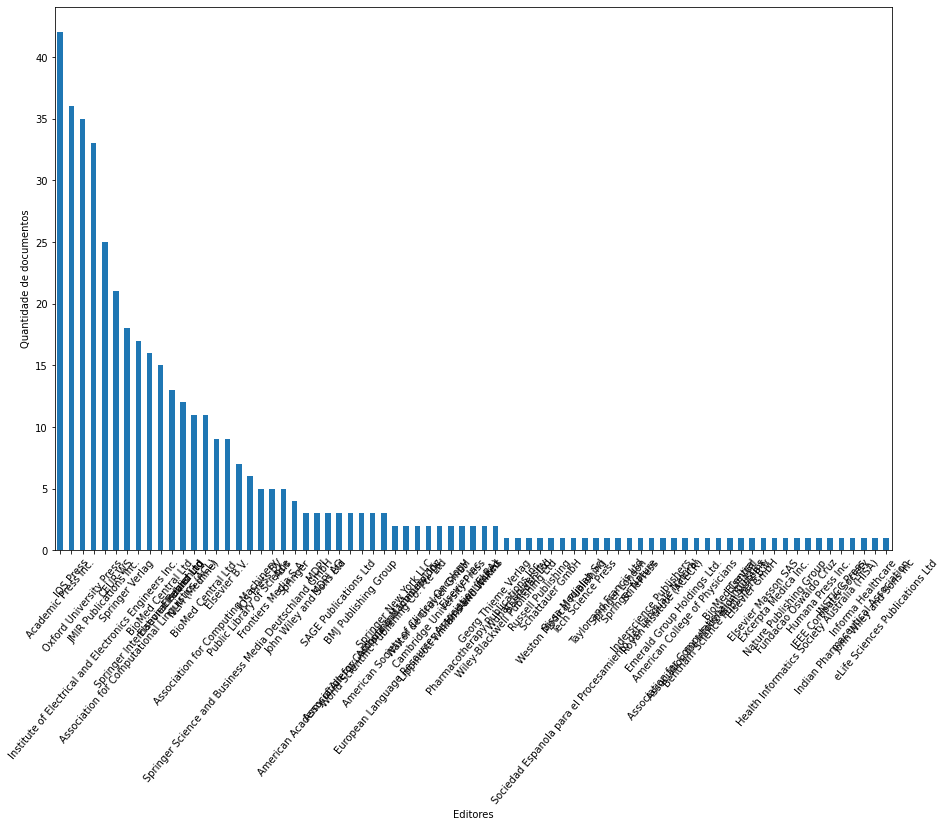

In [51]:
plt.figure(figsize=(15,10))
editor.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Editores")
plt.ylabel("Quantidade de documentos")

### Analisando documentos por Ano

In [52]:
# Groupby by
ano = df_scopus.groupby("ano")

# Summary statistic of all
ano.describe()

quantidade_paginas                                                      \
                  count    mean std     min     25%     50%     75%     max   
ano                                                                           
1992                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2000                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2001                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2003                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2004                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2005                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2006                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2007                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2008                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2009                1.0   448.0 NaN   448.0   448.0   448.0   448.0   448.0   
2010                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2011                1.0    11.0 NaN    11.0    11.0    11.0    11.0    11.0   
2012                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2013                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2014                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2015                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2016                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2017                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2018                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2019                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2020                1.0  1494.0 NaN  1494.0  1494.0  1494.0  1494.0  1494.0   
2021                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2022                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   

     quantidade_citacoes               ... fim_pagina_           \
                   count         mean  ...         75%      max   
ano                                    ...                        
1992                 1.0    30.000000  ...      896.00    896.0   
2000                 1.0    22.000000  ...      153.00    153.0   
2001                 1.0  1339.000000  ...       21.00     21.0   
2003                 3.0   138.000000  ...      437.00    533.0   
2004                 4.0    13.500000  ...      578.00    767.0   
2005                 5.0    14.800000  ...     1137.50   2066.0   
2006                 6.0    38.666667  ...      678.00    844.0   
2007                 4.0     9.750000  ...      397.50    549.0   
2008                10.0    24.700000  ...      620.50    691.0   
2009                 7.0    47.428571  ...      379.75   2083.0   
2010                16.0    23.750000  ...      608.50    913.0   
2011                15.0    35.133333  ...      758.00   1279.0   
2012                17.0    31.117647  ...     1003.00   1582.0   
2013                25.0    23.200000  ...      728.50    961.0   
2014                32.0    29.906250  ...      657.75   1069.0   
2015                40.0    38.125000  ...      431.75   1788.0   
2016                28.0    38.107143  ...      534.50   2028.0   
2017                49.0    22.734694  ...      688.00   7433.0   
2018                50.0    15.320000  ...      733.50   4809.0   
2019                53.0    11.981132  ...      839.00   6096.0   
2020                48.0     8.104167  ...      697.25  10381.0   
2021                34.0     2.411765  ...      908.50   3020.0   
2022                 3.0     1.333333  ...     1170.00   2123.0   

     quantidade_paginas_                                                     \
                   count        mean          std   min    25%   50%    75%   
ano                                              

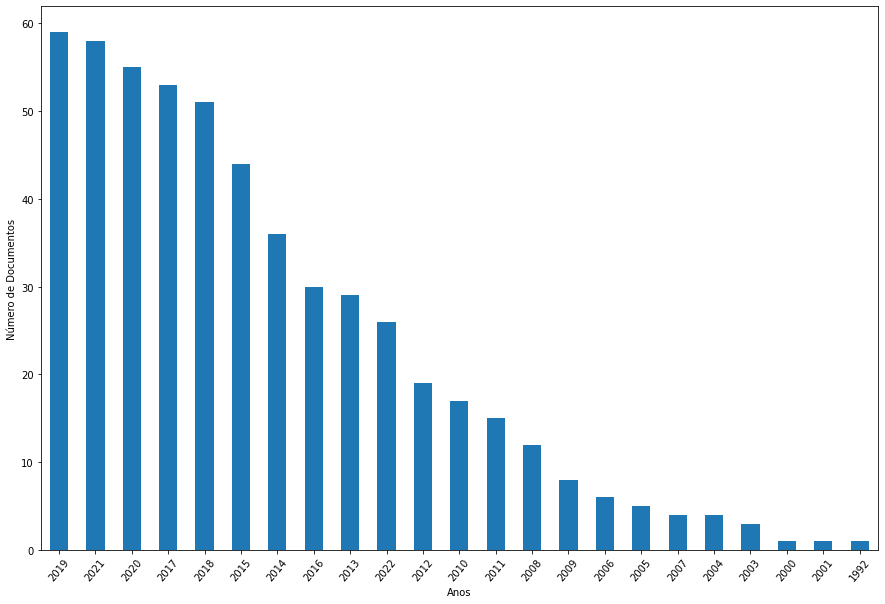

In [53]:
## Ordenar por ano
plt.figure(figsize=(15,10))
ano.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Anos")
plt.ylabel("Número de Documentos")
plt.show()

### Analisando os idiomas

In [54]:
# Groupby by
idioma = df_scopus.groupby("idioma_original")

# Summary statistic of all
idioma.describe().head()

ano                                                         \
                 count         mean       std     min     25%     50%     75%   
idioma_original                                                                 
English          535.0  2016.186916  4.450163  1992.0  2014.0  2017.0  2020.0   
French             1.0  2011.000000       NaN  2011.0  2011.0  2011.0  2011.0   
Spanish            1.0  2018.000000       NaN  2018.0  2018.0  2018.0  2018.0   

                        quantidade_paginas         ... fim_pagina_           \
                    max              count   mean  ...         75%      max   
idioma_original                                    ...                        
English          2022.0                3.0  651.0  ...      688.75  10381.0   
French           2011.0                0.0    NaN  ...      161.00    161.0   
Spanish          2018.0                0.0    NaN  ...       36.00     36.0   

                quantidade_paginas_                                        \
                              count       mean         std  min  25%  50%   
idioma_original                                                             
English                       392.0  49.596939  579.690874  1.0  4.0  7.0   
French                          1.0   3.000000         NaN  3.0  3.0  3.0   
Spanish                         1.0   5.000000         NaN  5.0  5.0  5.0   

                               
                  75%     max  
idioma_original                
English          9.25  9349.0  
French           3.00     3.0  
Spanish          5.00     5.0  

[3 rows x 128 columns]

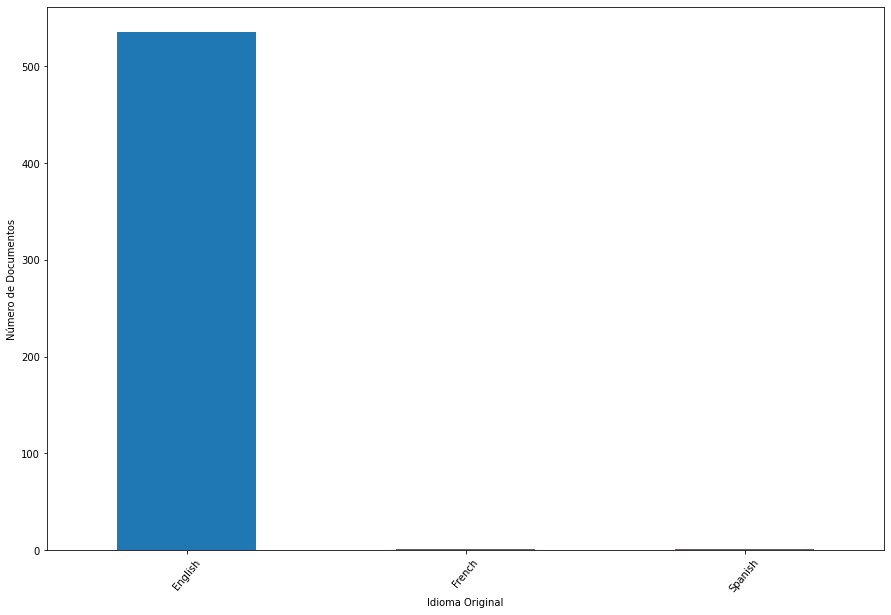

In [55]:
plt.figure(figsize=(15,10))
idioma.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Idioma Original")
plt.ylabel("Número de Documentos")
plt.show()

In [ ]:
# Gráfico demora
print('Visão geral em gráfico')
sns.pairplot(df_scopus)

 ### Nuvem de Palavras

#### Nuvem de Palavras dos Títulos

In [56]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [57]:
print('Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.')
palavras_titulo = df_scopus['titulo_documento'].str.lower()
palavras_titulo

Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.


95                                                                                  development of a questionnaire for detecting potential adverse drug reactions
129                              the use of a medical dictionary for regulatory activities terminology (meddra) in prescription event monitoring in japan (j pem)
0                                                                              effective mapping of biomedical text to the umls metathesaurus the metamap program
3                                                                                                           detecting adverse events using information technology
63                                                                            towards linking patients and clinical information detecting umls concepts in e mail
                                                                                  ...                                                                            
457    identification of han

In [58]:
print(f'Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.')
# Variável recebe conteúdo do dataframe palavras concatenando cada conteúdo do texto separando por espaço
wordcloud_palavras_titulo = " ".join(s for s in palavras_titulo)
#wordcloud_palavras

Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.


In [59]:
print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_titulo)} e seu tipo atual é {type(wordcloud_palavras_titulo)}')

Quantidade de palavras no corpus: 52002 e seu tipo atual é <class 'str'>


In [60]:
print(f'Criação da nuvem de palavras sem tratamento nos textos')
wordcloud_titulo = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_titulo)

Criação da nuvem de palavras sem tratamento nos textos


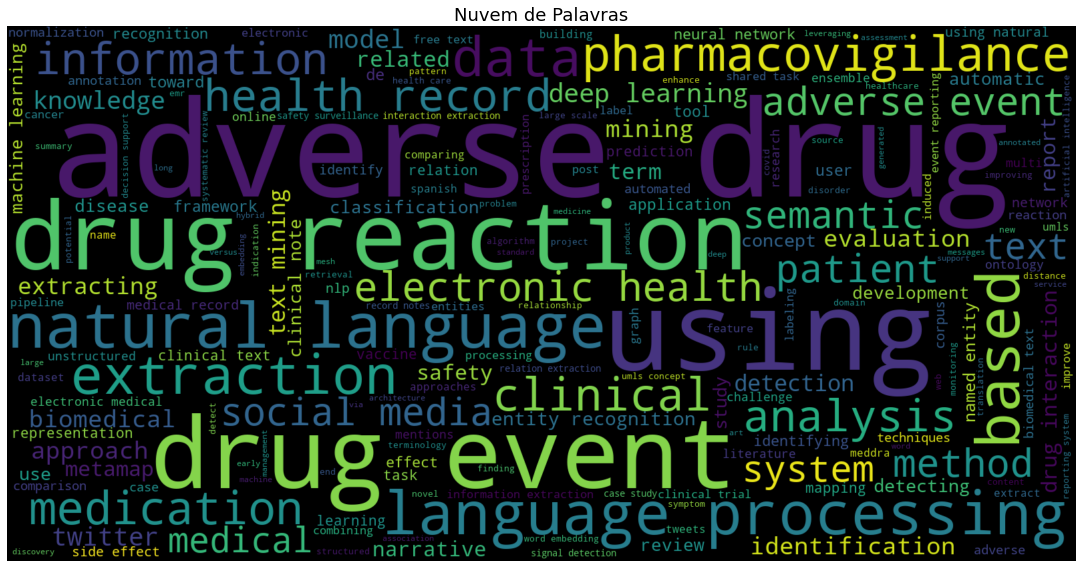

In [61]:
#Gráfico Nuvem de Palavras
# Gerando o grafico 
# Variáveis do gráfico 
path_image = '../image/'

titulo = 'Nuvem de Palavras'
#eixo_x = ''
#eixo_y = ''
image = path_image+'wordcloud_titulo'
extensao_arquivo = '.pdf'

#Gráfico
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud_titulo, interpolation='bilinear')
ax.set_axis_off()         

#legendas
#ax.legend(title='Legenda', loc=4, fontsize=9)
ax.set_title(titulo, fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)

#salvar imagens
plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.tight_layout() 
plt.show()

#### Nuvem de Palavras dos Resumos

In [62]:
print('Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.')
palavras_resumo = df_scopus['resumo'].str.lower()
palavras_resumo

Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.


95     objective: to develop a comprehensive list of symptoms categorized by body system as part of a questionnaire for detecting potential adverse drug reactions. data sources: a preliminary list of sym...
129    the medical dictionary for regulatory activities terminology (meddra) version 2.1 (v2.1) was released in march 1999 accompanied by the meddra/j v2.1j specifically for japanese users. in prescripti...
0      the umls metathesaurus, the largest thesaurus in the biomedical domain, provides a representation of biomedical knowledge consisting of concepts classified by semantic type and both hierarchical a...
3      context: although patient safety is a major problem, most health care organizations rely on spontaneous reporting, which detects only a small minority of adverse events. as a result, problems with...
63     the purpose of this project is to explore the feasibility of detecting terms within the electronic messages of patients that could be used to effectively search elec

In [63]:
print(f'Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.')
# Variável recebe conteúdo do dataframe palavras concatenando cada conteúdo do texto separando por espaço
wordcloud_palavras_resumo = " ".join(s for s in palavras_resumo)
#wordcloud_palavras

Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.


In [64]:
print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_resumo)} e seu tipo atual é{type(wordcloud_palavras_resumo)}')

Quantidade de palavras no corpus: 781594 e seu tipo atual é<class 'str'>


In [65]:
print(f'Criação da nuvem de palavras sem tratamento nos textos')
wordcloud_resumo = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_resumo)

Criação da nuvem de palavras sem tratamento nos textos


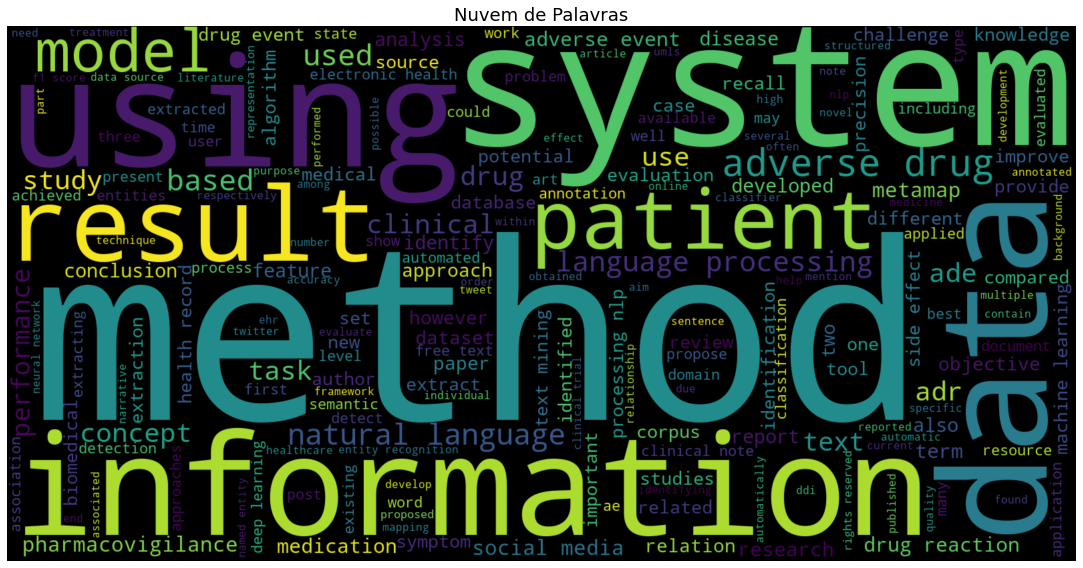

In [66]:
#Gráfico Nuvem de Palavras
path_image = '../image/'

titulo = 'Nuvem de Palavras'
#eixo_x = ''
#eixo_y = ''
image = path_image+'wordcloud_resumo'
extensao_arquivo = '.pdf'

#Gráfico
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud_resumo, interpolation='bilinear')
ax.set_axis_off()         

#legendas
#ax.legend(title='Legenda', loc=4, fontsize=9)
ax.set_title(titulo, fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)

#salvar imagens
plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.tight_layout() 
plt.show()

## Exportação do resultado para Excel

In [67]:
df_scopus.columns

Index(['autores_scopus', 'id_autores', 'titulo_documento', 'ano',
       'titulo_fonte', 'volume', 'publicado', 'numero_documento',
       'inicio_pagina', 'fim_pagina', 'quantidade_paginas',
       'quantidade_citacoes', 'doi_scopus', 'link_scopus', 'afiliacoes',
       'autores_com_filiacoes', 'resumo', 'palavras_chaves_autor',
       'palavras_chave_index', 'numeros_sequencia_molecular', 'chemicals_cas',
       'nomes_comerciais', 'fabricantes', 'detalhes_financiamento',
       'texto_financiamento_1', 'texto_financiamento_2',
       'texto_financiamento_3', 'texto_financiamento_4',
       'texto_financiamento_5', 'texto_financiamento_6',
       'texto_financiamento_7', 'texto_financiamento_8',
       'texto_financiamento_9', 'texto_financiamento_10', 'referencias',
       'endereco_correspondencia', 'editores', 'patrocinadores', 'editor',
       'nome_conferencia', 'data_conferencia', 'local_conferencia',
       'codigo_conferencia', 'issn_scopus', 'isbn', 'coden', 'id_pubmed',
   

In [68]:
## Gerar planilha com colunas especificas
#resultado_scopus = os.path.join('../data','scopus-08-06-2022.csv')
resultado_scopus = os.path.join('../data','resultado_scopus-24-06-2022.xlsx')
sheetname="base_scopus"

df_xlsx_scopus = pd.DataFrame(df_scopus, columns = [
       'issn_scopus','titulo_documento', 'ano','quantidade_citacoes', 'tipo_documento', 'nome_conferencia',
       'editores', 'patrocinadores', 'editor',
       'autores', 'id_autores', 'titulo_fonte',
       'volume', 'publicado', 'numero_documento',
       'inicio_pagina', 'fim_pagina','quantidade_paginas','inicio_pagina_','fim_pagina_','quantidade_paginas_',
       'doi', 'link_scopus',
       'afiliacoes', 'autores_com_filiacoes', 'resumo',
       'palavras_chaves_autor', 'palavras_chave_index',
       'numeros_sequencia_molecular', 'chemicals_cas', 'nomes_comerciais',
       'fabricantes',
       'detalhes_financiamento', 'texto_financiamento_1','texto_financiamento_2', 'texto_financiamento_3',
       'texto_financiamento_4','texto_financiamento_5', 'texto_financiamento_6', 'texto_financiamento_7',
       'texto_financiamento_8','texto_financiamento_9', 'texto_financiamento_10',
       'referencias', 'endereco_correspondencia', 
       'data_conferencia', 'local_conferencia',
       'codigo_conferencia', 'isbn', 'coden', 'id_pubmed',
       'idioma_original', 'titulo_abreviado_fonte', 
       'etapa_publicacao', 'acesso_livre', 'fonte', 'eid'
    ,])
df_xlsx_scopus = df_xlsx_scopus.to_excel(resultado_scopus, sheet_name=sheetname, index=False, encoding='utf-8', header=True)

# Carga - Base PubMed

In [69]:
print('Carga e Visualização do dataframe')
arquivo_base_pubmed = os.path.join('../data','pubmed-csv-naturallan-set-2022.csv')
raw_data_pubmed = pd.read_csv(arquivo_base_pubmed, sep=",", delimiter=None, encoding='utf-8')
raw_data_pubmed.head(3)

Carga e Visualização do dataframe


,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI
0,34653809,Automation of penicillin adverse drug reaction categorisation and risk stratification with machine learning natural language processing,"Inglis JM, Bacchi S, Troelnikov A, Smith W, Shakib S.",Int J Med Inform. 2021 Dec;156:104611. doi: 10.1016/j.ijmedinf.2021.104611. Epub 2021 Oct 5.,Inglis JM,Int J Med Inform,2021,2021/10/15,NaN,NaN,10.1016/j.ijmedinf.2021.104611
1,34406803,Customizable Natural Language Processing Biomarker Extraction Tool,"Holmes B, Chitale D, Loving J, Tran M, Subramanian V, Berry A, Rioth M, Warrier R, Brown T.",JCO Clin Cancer Inform. 2021 Aug;5:833-841. doi: 10.1200/CCI.21.00017.,Holmes B,JCO Clin Cancer Inform,2021,2021/08/18,NaN,NaN,10.1200/CCI.21.00017
2,28643174,Natural Language Processing for EHR-Based Pharmacovigilance: A Structured Review,"Luo Y, Thompson WK, Herr TM, Zeng Z, Berendsen MA, Jonnalagadda SR, Carson MB, Starren J.",Drug Saf. 2017 Nov;40(11):1075-1089. doi: 10.1007/s40264-017-0558-6.,Luo Y,Drug Saf,2017,2017/06/24,NaN,NaN,10.1007/s40264-017-0558-6


## Análise base PUBMED

### Colunas, dados nulos e tipos de dados

In [70]:
print('Verificando tipos e se tem dados nulos')
raw_data_pubmed.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PMID              188 non-null    int64 
 1   Title             188 non-null    object
 2   Authors           188 non-null    object
 3   Citation          188 non-null    object
 4   First Author      188 non-null    object
 5   Journal/Book      188 non-null    object
 6   Publication Year  188 non-null    int64 
 7   Create Date       188 non-null    object
 8   PMCID             134 non-null    object
 9   NIHMS ID          20 non-null     object
 10  DOI               158 non-null    object
dtypes: int64(2), object(9)
memory usage: 16.3+ KB


### Quantidade de conteúdo único para cada coluna

In [71]:
raw_data_pubmed.nunique()

PMID                188
Title               187
Authors             185
Citation            188
First Author        165
Journal/Book         63
Publication Year     20
Create Date         173
PMCID               134
NIHMS ID             20
DOI                 158
dtype: int64

### Quantidade de conteúdo nulo para cada coluna

In [72]:
# verificar campos nulos
raw_data_pubmed.isnull().sum()

PMID                  0
Title                 0
Authors               0
Citation              0
First Author          0
Journal/Book          0
Publication Year      0
Create Date           0
PMCID                54
NIHMS ID            168
DOI                  30
dtype: int64

### Resumo Estatístico de Campos Numéricos

In [73]:
raw_data_pubmed.describe()

,PMID,Publication Year
count,1.880000e+02,188.000000
mean,2.925529e+07,2017.196809
std,4.823380e+06,4.122274
min,1.182515e+07,2001.000000
25%,2.653983e+07,2015.000000
50%,3.000997e+07,2018.000000
75%,3.291973e+07,2020.000000
max,3.561223e+07,2022.000000


## Manutenção de dados

In [74]:
## Verificar se os dataframes nao s"ao espelhos
df_pubmed = raw_data_pubmed.copy()
print(id(df_pubmed), id(raw_data_pubmed))

3029528608144 3029560531392


### Ajustar nome das Colunas

In [75]:
print('Verificar colunas')
df_pubmed.columns

Verificar colunas


Index(['PMID', 'Title', 'Authors', 'Citation', 'First Author', 'Journal/Book',
       'Publication Year', 'Create Date', 'PMCID', 'NIHMS ID', 'DOI'],
      dtype='object')

In [76]:
columns_pubmed = {
    'PMID':'id_pubmed',
    'Title':'titulo_documento',
    'Authors':'autores_pubmed',
    'Citation':'citacao_pubmed',
    'First Author':'primeiro_autor_pubmed',
    'Journal/Book':'jornal_book_pubmed',
    'Publication Year':'ano_publicacao_pubmed',
    'Create Date':'data_criacao_pubmed', 
    'PMCID':'id_pmc_pubmed', 
    'NIHMS ID':'id_nihms_pubmed', 
    'DOI':'doi_pubmed',
}

In [77]:
df_pubmed = df_pubmed.rename(columns=columns_pubmed)
df_pubmed.head(2)

,id_pubmed,titulo_documento,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed
0,34653809,Automation of penicillin adverse drug reaction categorisation and risk stratification with machine learning natural language processing,"Inglis JM, Bacchi S, Troelnikov A, Smith W, Shakib S.",Int J Med Inform. 2021 Dec;156:104611. doi: 10.1016/j.ijmedinf.2021.104611. Epub 2021 Oct 5.,Inglis JM,Int J Med Inform,2021,2021/10/15,NaN,NaN,10.1016/j.ijmedinf.2021.104611
1,34406803,Customizable Natural Language Processing Biomarker Extraction Tool,"Holmes B, Chitale D, Loving J, Tran M, Subramanian V, Berry A, Rioth M, Warrier R, Brown T.",JCO Clin Cancer Inform. 2021 Aug;5:833-841. doi: 10.1200/CCI.21.00017.,Holmes B,JCO Clin Cancer Inform,2021,2021/08/18,NaN,NaN,10.1200/CCI.21.00017


### Criação de colunas

In [78]:
## criar uma coluna fonte com valor = pubmed
df_pubmed['fonte']='PubMed' # variavel para receber a base indexada do documento

In [79]:
df_pubmed["doi"] = df_pubmed["doi_pubmed"]

In [80]:
df_pubmed["titulo_documento_pubmed"] = df_pubmed["titulo_documento"]

### Ajuste de textos de algumas colunas para minúsculo (lower)

In [81]:
df_pubmed["titulo_documento"] = df_pubmed["titulo_documento"].str.lower()
df_pubmed["doi"] = df_pubmed["doi"].str.lower()

### Remover caracteres especiais

In [82]:
df_pubmed["titulo_documento"] = df_pubmed["titulo_documento"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|“|”|"|—|•', ' ', x))

In [83]:
df_pubmed.loc[:,'titulo_documento'] = df_pubmed['titulo_documento'].apply(limpar_campo)

In [84]:
df_pubmed['titulo_documento'] = df_pubmed['titulo_documento'].str.replace('  ', ' ')

### Remoção de espaços de textos de algumas colunas (strip)

In [85]:
df_pubmed["titulo_documento"] = df_pubmed["titulo_documento"].str.strip()

### Ajustar tipagem de dados

In [86]:
print('Ajustar tipagem dos dados')
df_pubmed['jornal_book_pubmed'] = df_pubmed['jornal_book_pubmed'].astype('category')

Ajustar tipagem dos dados


## Exclusão de documentos duplicados

In [87]:
# Ordenando para excluir primeiro as duplicidades
df_pubmed = df_pubmed.sort_values(['doi_pubmed','titulo_documento'])
df_pubmed[['doi_pubmed','titulo_documento']]

,doi_pubmed,titulo_documento
39,10.1002/pds.4857,comparison of text processing methods in social media based signal detection
21,10.1002/phar.2151,natural language processing and its implications for the future of medication safety a narrative review of recent advances and challenges
130,10.1002/prp2.421,screening of anticancer drugs to detect drug induced interstitial pneumonia using the accumulated data in the electronic medical record
76,10.1007/978-1-4939-0709-0_13,role of text mining in early identification of potential drug safety issues
100,10.1007/978-3-319-48472-3_43,an ontology enabled natural language processing pipeline for provenance metadata extraction from biomedical text (short paper)
...,...,...
35,NaN,social media mining shared task workshop
90,NaN,structured vs unstructured factors affecting adverse drug reaction documentation in an emr repository
85,NaN,structuring clinical decision support rules for drug safety using natural language processing
54,NaN,uarizona at the made1 0 nlp challenge


In [88]:
# 1 documentos duplicados
df_pubmed.titulo_documento.value_counts()

semantic processing to identify adverse drug event information from black box warnings                                                                     2
comparison of text processing methods in social media based signal detection                                                                               1
using named entity recognition to identify substances used in the self medication of opioid withdrawal natural language processing study of reddit data    1
ontological organization and bioinformatic analysis of adverse drug reactions from package inserts development and usability study                         1
identification of adverse drug event related japanese articles natural language processing analysis                                                        1
                                                                                                                                                          ..
an ensemble of neural models for nested adverse drug event

In [89]:
df_pubmed.query('titulo_documento == "semantic processing to identify adverse drug event information from black box warnings" ')[['id_pubmed', 'titulo_documento','ano_publicacao_pubmed', 'doi']]

,id_pubmed,titulo_documento,ano_publicacao_pubmed,doi
34,25954348,semantic processing to identify adverse drug event information from black box warnings,2014,NaN
161,24551335,semantic processing to identify adverse drug event information from black box warnings,2013,NaN


In [90]:
df_pubmed = df_pubmed.drop_duplicates(['titulo_documento','doi_pubmed'], keep='last') ## de 188 para [187 rows x 14 columns]
print(df_pubmed)

     id_pubmed  \
39    31392844   
21    29884988   
130   30009034   
76    24788270   
100   28664200   
..         ...   
35    26776221   
90    22195188   
85    29968609   
54    30467557   
102   28269895   

                                                                                                                              titulo_documento  \
39                                                                comparison of text processing methods in social media based signal detection   
21   natural language processing and its implications for the future of medication safety a narrative review of recent advances and challenges   
130    screening of anticancer drugs to detect drug induced interstitial pneumonia using the accumulated data in the electronic medical record   
76                                                                 role of text mining in early identification of potential drug safety issues   
100             an ontology enabled natural language 

In [91]:
df_pubmed.query('titulo_documento == "semantic processing to identify adverse drug event information from black box warnings" ')[['id_pubmed', 'titulo_documento','ano_publicacao_pubmed', 'doi']]

,id_pubmed,titulo_documento,ano_publicacao_pubmed,doi
161,24551335,semantic processing to identify adverse drug event information from black box warnings,2013,NaN


 ## Reanalisar dataframe tratado

In [92]:
print('Verificando tipos e se tem dados nulos')
df_pubmed.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 39 to 102
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id_pubmed                187 non-null    int64   
 1   titulo_documento         187 non-null    object  
 2   autores_pubmed           187 non-null    object  
 3   citacao_pubmed           187 non-null    object  
 4   primeiro_autor_pubmed    187 non-null    object  
 5   jornal_book_pubmed       187 non-null    category
 6   ano_publicacao_pubmed    187 non-null    int64   
 7   data_criacao_pubmed      187 non-null    object  
 8   id_pmc_pubmed            133 non-null    object  
 9   id_nihms_pubmed          20 non-null     object  
 10  doi_pubmed               158 non-null    object  
 11  fonte                    187 non-null    object  
 12  doi                      158 non-null    object  
 13  titulo_documento_pubmed  

In [93]:
df_pubmed.nunique()

id_pubmed                  187
titulo_documento           187
autores_pubmed             185
citacao_pubmed             187
primeiro_autor_pubmed      165
jornal_book_pubmed          63
ano_publicacao_pubmed       20
data_criacao_pubmed        172
id_pmc_pubmed              133
id_nihms_pubmed             20
doi_pubmed                 158
fonte                        1
doi                        158
titulo_documento_pubmed    187
dtype: int64

In [94]:
df_pubmed.isnull().sum()

id_pubmed                    0
titulo_documento             0
autores_pubmed               0
citacao_pubmed               0
primeiro_autor_pubmed        0
jornal_book_pubmed           0
ano_publicacao_pubmed        0
data_criacao_pubmed          0
id_pmc_pubmed               54
id_nihms_pubmed            167
doi_pubmed                  29
fonte                        0
doi                         29
titulo_documento_pubmed      0
dtype: int64

In [95]:
print('Resumo Estatístico de Campos Numéricos')
df_pubmed['ano_publicacao_pubmed'].describe()

Resumo Estatístico de Campos Numéricos


count     187.000000
mean     2017.213904
std         4.126653
min      2001.000000
25%      2015.000000
50%      2018.000000
75%      2020.000000
max      2022.000000
Name: ano_publicacao_pubmed, dtype: float64

## Visualizações

### Analisando documentos por Ano

In [96]:
ano_pubmed = df_pubmed.groupby("ano_publicacao_pubmed")
ano_pubmed.describe()

id_pubmed                                          \
                          count          mean           std         min   
ano_publicacao_pubmed                                                     
2001                        1.0  1.182515e+07           NaN  11825149.0   
2003                        1.0  1.464373e+07           NaN  14643729.0   
2004                        1.0  1.536086e+07           NaN  15360865.0   
2005                        2.0  1.646973e+07  4.375117e+05  16160360.0   
2006                        1.0  1.635993e+07           NaN  16359928.0   
2008                        2.0  1.899896e+07  1.329361e+02  18998862.0   
2009                        3.0  1.979178e+07  5.455761e+05  19261932.0   
2010                        5.0  2.137939e+07  1.359627e+06  20179584.0   
2011                        2.0  2.194041e+07  3.603147e+05  21685626.0   
2012                        4.0  2.427678e+07  3.163848e+06  22122057.0   
2013                        7.0  2.368989e+07  6.567909e+05  23043124.0   
2014                       10.0  2.503922e+07  3.364165e+05  24431333.0   
2015                       10.0  2.607361e+07  4.050733e+05  25451103.0   
2016                        8.0  2.751146e+07  6.476863e+05  26776215.0   
2017                       24.0  2.871028e+07  6.588765e+05  26851224.0   
2018                       21.0  3.000023e+07  3.815411e+05  29186491.0   
2019                       23.0  3.113712e+07  5.148127e+05  29994486.0   
2020                       19.0  3.251826e+07  6.204742e+05  31197355.0   
2021                       26.0  3.413025e+07  4.343688e+05  33006728.0   
2022                       17.0  3.530383e+07  3.035598e+05  34468999.0   

                                                                         
                               25%         50%          75%         max  
ano_publicacao_pubmed                                                    
2001                   11825149.00  11825149.0  11825149.00  11825149.0  
2003                   14643729.00  14643729.0  14643729.00  14643729.0  
2004                   15360865.00  15360865.0  15360865.00  15360865.0  
2005                   16315043.75  16469727.5  16624411.25  16779095.0  
2006                   16359928.00  16359928.0  16359928.00  16359928.0  
2008                   18998909.00  18998956.0  18999003.00  18999050.0  
2009                   19511749.50  19761567.0  20056698.00  20351829.0  
2010                   20406501.00  21346964.0  21347051.00  23616843.0  
2011                   21813016.50  21940407.0  22067797.50  22195188.0  
2012                   22565788.50  23009037.0  24720031.50  28967001.0  
2013                   23150404.00  23475786.0  24229076.00  24551357.0  
2014                   24875911.75  25008835.5  25148922.00  25600332.0  
2015                   25795609.00  26029773.0  26469570.50  26556646.0  
2016                   26964018.75  27557352.0  27848563.50  28664200.0  
2017                   28378793.50  28714776.0  29188289.25  29977659.0  
2018                   29860093.00  30009034.0  30262450.00  30591037.0  
2019                   30860167.00  31162134.0  31437957.50  31947235.0  
2020                   32430547.00  32570374.0  32854696.00  33380331.0  
2021                   33936443.75  34160910.5  34419146.50  34951601.0  
2022                   35175201.00  35342285.0  35579806.00  35612234.0

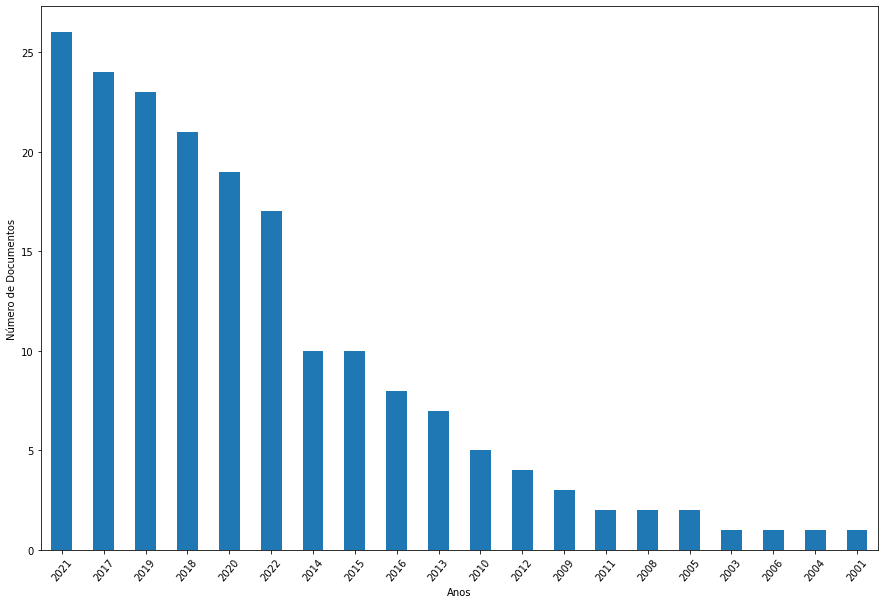

In [97]:
## Ordenar por ano
plt.figure(figsize=(15,10))
ano_pubmed.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Anos")
plt.ylabel("Número de Documentos")
plt.show()

### Analisando documentos por Jornal

In [98]:
jornal_book_pubmed = df_pubmed.groupby("jornal_book_pubmed")
jornal_book_pubmed.describe()

id_pubmed                \
                                                      count          mean   
jornal_book_pubmed                                                          
AMIA Annu Symp Proc                                    17.0  2.605743e+07   
AMIA Jt Summits Transl Sci Proc                         1.0  3.247765e+07   
Annu Int Conf IEEE Eng Med Biol Soc                     1.0  3.194724e+07   
Appl Clin Inform                                        1.0  2.361684e+07   
Artif Intell Med                                        1.0  2.743104e+07   
...                                                     ...           ...   
Proceedings (IEEE Int Conf Bioinformatics Biomed)       1.0  2.997766e+07   
SHB12 (2012)                                            1.0  2.896700e+07   
Stud Health Technol Inform                             14.0  2.855665e+07   
Vaccines (Basel)                                        1.0  3.506276e+07   
Yearb Med Inform                                        2.0  2.647699e+07   

                                                                             \
                                                            std         min   
jornal_book_pubmed                                                            
AMIA Annu Symp Proc                                6.453781e+06  16779095.0   
AMIA Jt Summits Transl Sci Proc                             NaN  32477654.0   
Annu Int Conf IEEE Eng Med Biol Soc                         NaN  31947235.0   
Appl Clin Inform                                            NaN  23616843.0   
Artif Intell Med                                            NaN  27431037.0   
...                                                         ...         ...   
Proceedings (IEEE Int Conf Bioinformatics Biomed)           NaN  29977659.0   
SHB12 (2012)                                                NaN  28967001.0   
Stud Health Technol Inform                         6.297008e+06  15360865.0   
Vaccines (Basel)                                            NaN  35062764.0   
Yearb Med Inform                                   1.913804e+06  25123728.0   

                                                                            \
                                                           25%         50%   
jornal_book_pubmed                                                           
AMIA Annu Symp Proc                                21346964.00  24551335.0   
AMIA Jt Summits Transl Sci Proc                    32477654.00  32477654.0   
Annu Int Conf IEEE Eng Med Biol Soc                31947235.00  31947235.0   
Appl Clin Inform                                   23616843.00  23616843.0   
Artif Intell Med                                   27431037.00  27431037.0   
...                                                        ...         ...   
Proceedings (IEEE Int Conf Bioinformatics Biomed)  29977659.00  29977659.0   
SHB12 (2012)                                       28967001.00  28967001.0   
Stud Health Technol Inform                         28986190.75  30703247.0   
Vaccines (Basel)                                   35062764.00  35062764.0   
Yearb Med Inform                                   25800359.75  26476991.5   

                                                                            \
                                                           75%         max   
jornal_book_pubmed                                                           
AMIA Annu Symp Proc                                33936399.00  35308927.0   
AMIA Jt Summits Transl Sci Proc                    32477654.00  32477654.0   
Annu Int Conf IEEE Eng Med Biol Soc                31947235.00  31947235.0   
Appl Clin Inform                                   23616843.00  23616843.0   
Artif Intell Med                                   27431037.00  27431037.0   
...                                                        ...         ...   
Proceedings (IEEE Int Conf Bioinformatics Biomed)  29977659.00  29977

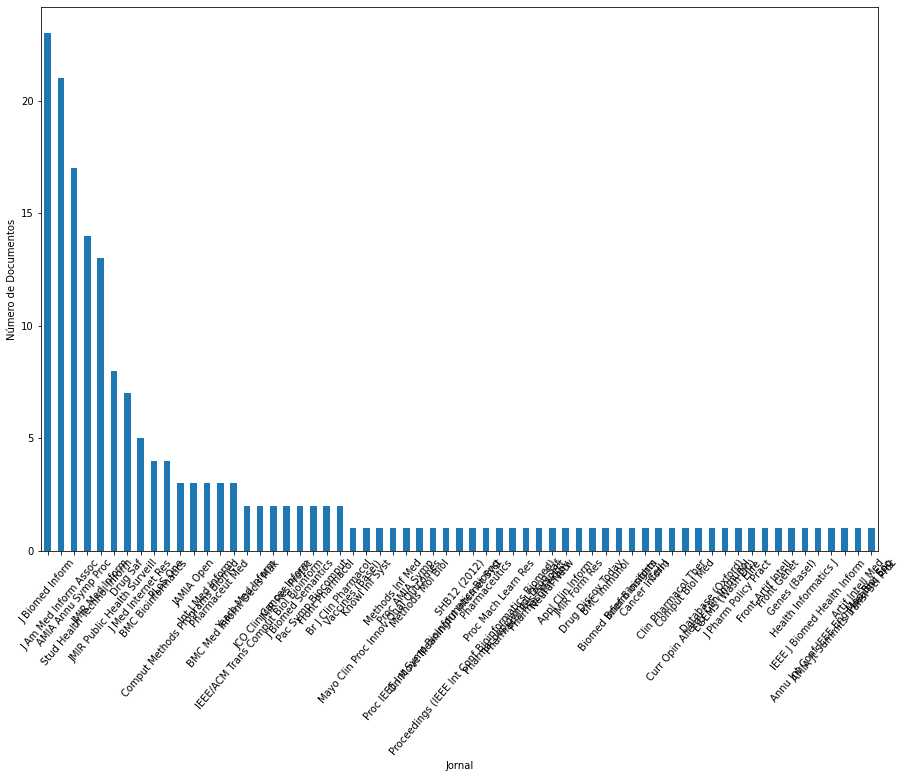

In [99]:
## Pegar os 10 +
plt.figure(figsize=(15,10))
jornal_book_pubmed.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Jornal")
plt.ylabel("Número de Documentos")
plt.show()

### Nuvem de Palavras

#### Nuvem de Palavras dos Títulos

In [100]:
print('Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.')
palavras_titulo_pubmed = df_pubmed['titulo_documento'].str.lower()
palavras_titulo_pubmed

Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.


39                                                                  comparison of text processing methods in social media based signal detection
21     natural language processing and its implications for the future of medication safety a narrative review of recent advances and challenges
130      screening of anticancer drugs to detect drug induced interstitial pneumonia using the accumulated data in the electronic medical record
76                                                                   role of text mining in early identification of potential drug safety issues
100               an ontology enabled natural language processing pipeline for provenance metadata extraction from biomedical text (short paper)
                                                                         ...                                                                    
35                                                                                                      social media mining shared

In [101]:
wordcloud_palavras_titulo_pubmed = " ".join(s for s in palavras_titulo_pubmed)
print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_titulo_pubmed)} e seu tipo atual é{type(wordcloud_palavras_titulo_pubmed)}')

Quantidade de palavras no corpus: 19967 e seu tipo atual é<class 'str'>


In [102]:
print(f'Criação da nuvem de palavras sem tratamento nos textos')
wordcloud_titulo_pubmed = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_titulo_pubmed)

Criação da nuvem de palavras sem tratamento nos textos


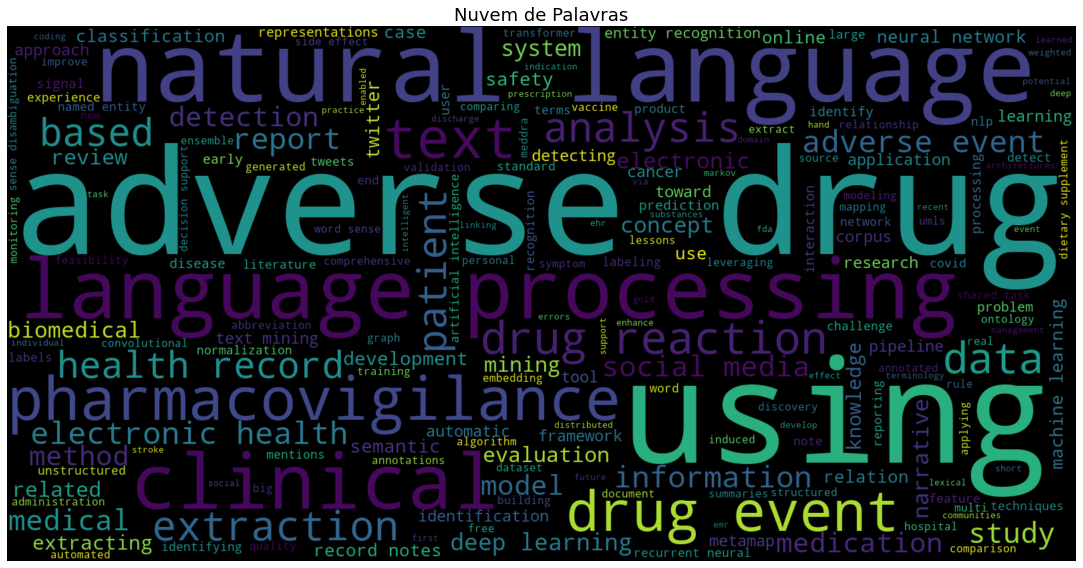

In [103]:
path_image = '../image/'

titulo = 'Nuvem de Palavras'
#eixo_x = ''
#eixo_y = ''
image = path_image+'wordcloud_titulo_pubmed'
extensao_arquivo = '.pdf'

#Gráfico
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud_titulo_pubmed, interpolation='bilinear')
ax.set_axis_off()         

#legendas
#ax.legend(title='Legenda', loc=4, fontsize=9)
ax.set_title(titulo, fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)

#salvar imagens
plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.tight_layout() 
plt.show()

## Exportação do resultado para Excel

In [104]:
df_pubmed.columns

Index(['id_pubmed', 'titulo_documento', 'autores_pubmed', 'citacao_pubmed',
       'primeiro_autor_pubmed', 'jornal_book_pubmed', 'ano_publicacao_pubmed',
       'data_criacao_pubmed', 'id_pmc_pubmed', 'id_nihms_pubmed', 'doi_pubmed',
       'fonte', 'doi', 'titulo_documento_pubmed'],
      dtype='object')

In [105]:
## Gerar planilha com colunas especificas
#resultado_geral = os.path.join('../data','scopus-31-05-2021.csv')
resultado_pubmed = os.path.join('../data','resultado_pubmed-25-06-22.xlsx')
sheetname="base_pubmed"

df_xlsx_pubmed = pd.DataFrame(df_pubmed, columns = [
    'id_pubmed', 'titulo_documento','titulo_documento_pubmed','ano_publicacao_pubmed','fonte','autores_pubmed', 'citacao_pubmed',
    'primeiro_autor_pubmed', 'jornal_book_pubmed','data_criacao_pubmed',
    'id_pmc_pubmed', 'id_nihms_pubmed', 'doi','doi_pubmed'
    ,])
df_xlsx_pubmed = df_xlsx_pubmed.to_excel(resultado_pubmed,sheet_name=sheetname,index=False, encoding='utf-8', header=True)

# Concatenar dataframes de bases indexadas

In [106]:
#https://www.acervolima.com.br/2020/08/concat-e-append-do-pandas-como-usar.html
qtde_scopus = df_scopus.titulo_documento.count()
qtde_pubmed = df_pubmed.titulo_documento.count()

# 3 colunas em comum: titulo_documento, id_pubmed, fonte
shape_scopus = df_scopus.shape
shape_pubmed = df_pubmed.shape

print(f'A quantidade de documentos na base scopus é: {qtde_scopus} e a quantidade de colunas é {shape_scopus}')
print(f'A quantidade de documentos na base pubmed é: {qtde_pubmed} e a quantidade de colunas é {shape_pubmed}')
print(f'O total de documentos concatedos tem que ser {qtde_pubmed+qtde_scopus}')

A quantidade de documentos na base scopus é: 537 e a quantidade de colunas é (537, 59)
A quantidade de documentos na base pubmed é: 187 e a quantidade de colunas é (187, 14)
O total de documentos concatedos tem que ser 724


In [107]:
frames = [df_scopus, df_pubmed]

In [108]:
df_bases = pd.concat(frames)

In [109]:
df_bases

,autores_scopus,id_autores,titulo_documento,ano,titulo_fonte,volume,publicado,numero_documento,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_documento_pubmed
95,"Corso D.M., Pucino F., DeLeo J.M., Calis K.A., Gallelli J.F.",6602576929;6701705695;35579441300;57221571096;7003762821;,development of a questionnaire for detecting potential adverse drug reactions,1992.0,Annals of Pharmacotherapy,26,7-8,NaN,890,896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,"Yokotsuka M., Aoyama M., Kubota K.",6505861090;7202591218;24356074400;,the use of a medical dictionary for regulatory activities terminology (meddra) in prescription event monitoring in japan (j pem),2000.0,International Journal of Medical Informatics,57,2-3,NaN,139,153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Aronson A.R.,17933416200;,effective mapping of biomedical text to the umls metathesaurus the metamap program,2001.0,Proceedings / AMIA ... Annual Symposium. AMIA Symposium,NaN,NaN,NaN,17,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Bates D.W., Evans R.S., Murff H., Stetson P.D., Pizzifferri L., Hripcsak G.",57113031900;7405652324;6701719661;7005833624;6508207735;7004471151;,detecting adverse events using information technology,2003.0,Journal of the American Medical Informatics Association,10,2,NaN,115,128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,"Brennan P.F., Aronson A.R.",35473309900;17933416200;,towards linking patients and clinical information detecting umls concepts in e mail,2003.0,Journal of Biomedical Informatics,36,4-5,NaN,334,341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,NaN,NaN,social media mining shared task workshop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Sarker A, Nikfarjam A, Gonzalez G.",Pac Symp Biocomput. 2016;21:581-92.,Sarker A,Pac Symp Biocomput,2016.0,2016/01/19,NaN,NaN,NaN,SOCIAL MEDIA MINING SHARED TASK WORKSHOP
90,NaN,NaN,structured vs unstructured factors affecting adverse drug reaction documentation in an emr repository,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Skentzos S, Shubina M, Plutzky J, Turchin A.",AMIA Annu Symp Proc. 2011;2011:1270-9. Epub 2011 Oct 22.,Skentzos S,AMIA Annu Symp Proc,2011.0,2011/12/24,PMC3243255,NaN,NaN,Structured vs. unstructured: factors affecting adverse drug reaction documentation in an EMR repository
85,NaN,NaN,structuring clinical decision support rules for drug safety using natural language processing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Despotou G, Korkontzelos I, Matragkas N, Bilici E, Arvanitis TN.",Stud Health Technol Inform. 2018;251:89-92.,Despotou G,Stud Health Technol Inform,2018.0,2018/07/04,NaN,NaN,NaN,Structuring Clinical Decision Support Rules for Drug Safety Using Natural Language Processing
54,NaN,NaN,uarizona at the made1 0 nlp challenge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Xu D, Yadav V, Bethard S.",Proc Mach Learn Res. 2018 May;90:57-65.,Xu D,Proc Mach Learn Res,2018.0,2018/11/24,PMC6245580,NIHMS995640,NaN,UArizona at the MADE1.0 NLP Challenge


## Remover caracteres especiais

In [110]:
df_bases.query('doi_pubmed == "10.1007/978-3-319-48472-3_43" ')[['titulo_documento','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

,titulo_documento,id_pubmed,issn_scopus,doi_scopus,doi_pubmed
100,an ontology enabled natural language processing pipeline for provenance metadata extraction from biomedical text (short paper),28664200.0,NaN,NaN,10.1007/978-3-319-48472-3_43


In [111]:
df_bases.query('doi_scopus == "10.1007/978-3-319-48472-3_43" ')[['titulo_documento','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

,titulo_documento,id_pubmed,issn_scopus,doi_scopus,doi_pubmed
289,an ontology enabled natural language processing pipeline for provenance metadata extraction from biomedical text,NaN,03029743,10.1007/978-3-319-48472-3_43,NaN


### Remover caracteres especiais

In [112]:
#remove números e caracteres especiais
#df_bases["titulo_documento"] = df_bases["titulo_documento"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|“|”|"|—|•', ' ', x))

df_bases["titulo_documento"] = df_bases["titulo_documento"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|"|•', ' ', x))

In [113]:
df_bases.loc[:,'titulo_documento'] = df_bases['titulo_documento'].apply(limpar_campo)

In [114]:
df_bases['titulo_documento'] = df_bases['titulo_documento'].str.replace('  ', ' ')

In [115]:
df_bases["titulo_documento"] = df_bases["titulo_documento"].str.strip()

In [116]:
df_bases.query('doi_pubmed == "10.1007/978-3-319-48472-3_43" ')[['titulo_documento','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

,titulo_documento,id_pubmed,issn_scopus,doi_scopus,doi_pubmed
100,an ontology enabled natural language processing pipeline for provenance metadata extraction from biomedical text (short paper),28664200.0,NaN,NaN,10.1007/978-3-319-48472-3_43


## Exclusão de documentos da base final

### Exclusão de documentos duplicados

In [117]:
## ordenando de forma para que fique os documentos da base scopus
df_bases = df_bases.sort_values(['fonte','autores_pubmed'])

In [118]:
## Length total 724 - sem duplicidades = 553, porém, na exclusão fica 554, ajustado para ficar 553
df_bases.titulo_documento.value_counts()

training augmented intelligent capabilities for pharmacovigilance applying deep learning approaches to individual case safety report processing    2
ai based language models powering drug discovery and development                                                                                   2
on the creation of a clinical gold standard corpus in spanish mining adverse drug reactions                                                        2
efficient identification of nationally mandated reportable cancer cases using natural language processing and machine learning                     2
adverse drug event discovery using biomedical literature a big data neural network adventure                                                       2
                                                                                                                                                  ..
text mining for adverse drug events the promise challenges and state of the art                           

In [119]:
df_bases.query('titulo_documento == "ai based language models powering drug discovery and development" ')[['eid','fonte','id_pubmed','quantidade_paginas_','titulo_documento']]

,eid,fonte,id_pubmed,quantidade_paginas_,titulo_documento
5,NaN,PubMed,34216835.0,NaN,ai based language models powering drug discovery and development
321,2-s2.0-85110540049,Scopus,34216835.0,14.0,ai based language models powering drug discovery and development


In [120]:
df_bases.query('titulo_documento == "adverse drug event discovery using biomedical literature a big data neural network adventure" ')[['eid','fonte','id_pubmed','quantidade_paginas_','titulo_documento']]

,eid,fonte,id_pubmed,quantidade_paginas_,titulo_documento
37,NaN,PubMed,29222076.0,NaN,adverse drug event discovery using biomedical literature a big data neural network adventure
82,2-s2.0-85047825131,Scopus,NaN,NaN,adverse drug event discovery using biomedical literature a big data neural network adventure


In [121]:
df_bases = df_bases.drop_duplicates(['titulo_documento', 'doi'], keep='last') ## de 724 para [561 rows x 69 columns]
print(df_bases)

                                                                                                       autores_scopus  \
164                                                                                                               NaN   
85                                                                                                                NaN   
122                                                                                                               NaN   
99                                                                                                                NaN   
183                                                                                                               NaN   
..                                                                                                                ...   
457  Nishioka S., Watanabe T., Asano M., Yamamoto T., Kawakami K., Yada S., Aramaki E., Yajima H., Kizaki H., Hori S.   
468                             

In [122]:
df_bases = df_bases.drop_duplicates(['titulo_documento', 'id_pubmed'], keep='last') #### de 561 para [554 rows x 554 columns]
print(df_bases)

                                                                                                       autores_scopus  \
122                                                                                                               NaN   
99                                                                                                                NaN   
174                                                                                                               NaN   
181                                                                                                               NaN   
30                                                                                                                NaN   
..                                                                                                                ...   
457  Nishioka S., Watanabe T., Asano M., Yamamoto T., Kawakami K., Yada S., Aramaki E., Yajima H., Kizaki H., Hori S.   
468                             

In [123]:
df_bases.query('titulo_documento == "ai based language models powering drug discovery and development" ')[['eid','fonte','id_pubmed','quantidade_paginas_','titulo_documento']]

,eid,fonte,id_pubmed,quantidade_paginas_,titulo_documento
321,2-s2.0-85110540049,Scopus,34216835.0,14.0,ai based language models powering drug discovery and development


In [124]:
df_bases.query('titulo_documento == "adverse drug event discovery using biomedical literature a big data neural network adventure" ')[['eid','fonte','id_pubmed','quantidade_paginas_','titulo_documento']]

,eid,fonte,id_pubmed,quantidade_paginas_,titulo_documento
82,2-s2.0-85047825131,Scopus,NaN,NaN,adverse drug event discovery using biomedical literature a big data neural network adventure


In [125]:
df_bases.titulo_documento.value_counts()

in silico analysis of autoimmune diseases and genetic relationships to vaccination against infectious diseases                            2
v3nlp framework tools to build applications for extracting concepts from clinical text                                                    1
a study on the application and use of artificial intelligence to support drug development                                                 1
smoothing dense spaces for improved relation extraction between drugs and adverse reactions                                               1
detecting adverse drug reactions in discharge summaries of electronic medical records using readpeer                                      1
                                                                                                                                         ..
method for detecting drug induced interstitial pneumonia from accumulated medical record data at a hospital                               1
methods for the dete

In [126]:
df_bases.query('titulo_documento == "in silico analysis of autoimmune diseases and genetic relationships to vaccination against infectious diseases" ')[['eid','fonte','id_pubmed','quantidade_paginas_','titulo_documento']]

,eid,fonte,id_pubmed,quantidade_paginas_,titulo_documento
141,NaN,PubMed,25486901.0,NaN,in silico analysis of autoimmune diseases and genetic relationships to vaccination against infectious diseases
530,2-s2.0-84888175735,Scopus,NaN,1.0,in silico analysis of autoimmune diseases and genetic relationships to vaccination against infectious diseases


In [127]:
df_bases.query('id_pubmed == 25486901.0 ')[['eid','fonte','id_pubmed','quantidade_paginas_','titulo_documento']]

,eid,fonte,id_pubmed,quantidade_paginas_,titulo_documento
141,NaN,PubMed,25486901.0,NaN,in silico analysis of autoimmune diseases and genetic relationships to vaccination against infectious diseases
154,2-s2.0-84923927235,Scopus,25486901.0,NaN,analysis of autoimmune diseases and genetic relationships to vaccination against infectious diseases


In [128]:
mask = (df_bases['id_pubmed'] == 25486901.0) & (df_bases['fonte'] == 'PubMed')
df_bases = df_bases.loc[~mask]

In [129]:
df_bases.query('titulo_documento == "in silico analysis of autoimmune diseases and genetic relationships to vaccination against infectious diseases" ')[['eid','fonte','id_pubmed','quantidade_paginas_','titulo_documento']]

,eid,fonte,id_pubmed,quantidade_paginas_,titulo_documento
530,2-s2.0-84888175735,Scopus,NaN,1.0,in silico analysis of autoimmune diseases and genetic relationships to vaccination against infectious diseases


## Exclusão de documentos por tipo
##### Tipos: "Conference Review","Editorial","Letter","Note"

In [130]:
# ver os tipos de documentos
df_bases.groupby(by=["tipo_documento"]).sum()

,ano,quantidade_paginas,quantidade_citacoes,numeros_sequencia_molecular,texto_financiamento_4,texto_financiamento_5,texto_financiamento_6,texto_financiamento_7,texto_financiamento_8,texto_financiamento_9,texto_financiamento_10,codigo_conferencia,id_pubmed,inicio_pagina_,fim_pagina_,quantidade_paginas_,ano_publicacao_pubmed
tipo_documento,,,,,,,,,,,,,,,,,
Article,661310.0,0.0,9267.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.150187e+09,126963.0,138683.0,17858.0,0.0
Book,2014.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.0,264.0,263.0,0.0
Book Chapter,16140.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.404286e+07,3756.0,3849.0,93.0,0.0
Conference Paper,324546.0,11.0,1217.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20984161.0,9.948066e+08,66111.0,63583.0,901.0,0.0
Conference Review,6046.0,1942.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,428626.0,0.000000e+00,1.0,132.0,131.0,0.0
Editorial,8072.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.190715e+08,1166.0,1174.0,8.0,0.0
Letter,6049.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.394043e+07,3528.0,3534.0,6.0,0.0
Note,6056.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.864613e+07,1120.0,1134.0,14.0,0.0
Review,50437.0,0.0,707.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.143306e+08,9792.0,9967.0,175.0,0.0


In [131]:
# retirar documentos: Conference Review, Editorial, letter e Note
# gerar plan geral e testar se os filtros funcionam só no scopus para maior assertividade

lista_tipo_doc = ["Conference Review","Editorial","Letter","Note"]

df_bases_filtrado = df_bases.query('tipo_documento != @lista_tipo_doc ') ## de 553 para = 540 rows × 69 columns
df_bases_filtrado

,autores_scopus,id_autores,titulo_documento,ano,titulo_fonte,volume,publicado,numero_documento,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_documento_pubmed
122,NaN,NaN,v3nlp framework tools to build applications for extracting concepts from clinical text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Divita G, Carter ME, Tran LT, Redd D, Zeng QT, Duvall S, Samore MH, Gundlapalli AV.",EGEMS (Wash DC). 2016 Aug 11;4(3):1228. doi: 10.13063/2327-9214.1228. eCollection 2016.,Divita G,EGEMS (Wash DC),2016.0,2016/09/30,PMC5019303,NaN,10.13063/2327-9214.1228,v3NLP Framework: Tools to Build Applications for Extracting Concepts from Clinical Text
99,NaN,NaN,intelligent telehealth in pharmacovigilance a future perspective,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Edrees H, Song W, Syrowatka A, Simona A, Amato MG, Bates DW.",Drug Saf. 2022 May;45(5):449-458. doi: 10.1007/s40264-022-01172-5. Epub 2022 May 17.,Edrees H,Drug Saf,2022.0,2022/05/17,PMC9112241,NaN,10.1007/s40264-022-01172-5,Intelligent Telehealth in Pharmacovigilance: A Future Perspective
174,NaN,NaN,artificial intelligence enabled social media analysis for pharmacovigilance of covid 19 vaccinations in the united kingdom observational study,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Hussain Z, Sheikh Z, Tahir A, Dashtipour K, Gogate M, Sheikh A, Hussain A.",JMIR Public Health Surveill. 2022 May 27;8(5):e32543. doi: 10.2196/32543.,Hussain Z,JMIR Public Health Surveill,2022.0,2022/02/10,PMC9150729,NaN,10.2196/32543,Artificial Intelligence-Enabled Social Media Analysis for Pharmacovigilance of COVID-19 Vaccinations in the United Kingdom: Observational Study
181,NaN,NaN,prediction of personal experience tweets of medication use via contextual word representations(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Jiang K, Chen T, Calix RA, Bernard GR.",Annu Int Conf IEEE Eng Med Biol Soc. 2019 Jul;2019:6093-6096. doi: 10.1109/EMBC.2019.8856753.,Jiang K,Annu Int Conf IEEE Eng Med Biol Soc,2019.0,2020/01/18,NaN,NaN,10.1109/EMBC.2019.8856753,Prediction of Personal Experience Tweets of Medication Use via Contextual Word Representations()
30,NaN,NaN,normalizing adverse events using recurrent neural networks with attention,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Lee K, Uzuner Ö.",AMIA Jt Summits Transl Sci Proc. 2020 May 30;2020:345-354. eCollection 2020.,Lee K,AMIA Jt Summits Transl Sci Proc,2020.0,2020/06/02,PMC7233057,NaN,NaN,Normalizing Adverse Events using Recurrent Neural Networks with Attention
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,"Nishioka S., Watanabe T., Asano M., Yamamoto T., Kawakami K., Yada S., Aramaki E., Yajima H., Kizaki H., Hori S.",57665231500;57665866200;57666183300;57666504400;36484772100;57219665421;57203225161;57665866300;57607977600;8058209600;,identification of hand foot syndrome from cancer patients’ blog posts bert based deep learning approach to detect potential adverse drug reaction symptoms,2022.0,PLoS ONE,17,5 May,e0267901,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,"Yang J.C., Thygesen J.H., Werbeloff N., Hayes J.F., Osborn D.P.J.",57202692614;42162169300;25522505100;36518630100;7101639320;,antipsychotic polypharmacy and adverse drug reactions among adults in a london mental health service 2008 2018,2022.0,Psychological Medicine,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,"Vo T.H., Nguyen N.T.K., Kha Q.H., Le N.Q.K.",57671574900;57211071169;57224131231;57208281644;,on the road to explainable ai in drug drug interactions prediction a systematic review,2022.0,Computational and Structural Biotechnology Journal,20,NaN,NaN,2112,2123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,Aronson J.K.,55683060600;,artificial intelligence in pharmacovigilance an introduction to terms concepts applications and limitations,2022.0,Drug Safety,45,5,NaN,407,418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Exclusão de documentos com menos de 4 páginas

In [132]:
## pegar alguns documentos para ver se procede

In [133]:
## De 540 ficam 515 rows
# retirar documentos com menos de 3 páginas e deixar os campos vazios tbm

#numumero_paginas = 3

#df.query('year > 2012 | name == "Frank"')
#df_bases_filtrado = df_bases.query('quantidade_paginas_ > @numumero_paginas ')
#df_bases_filtrado = df_bases.query('quantidade_paginas_ == None ')


df_bases_filtrado = df_bases_filtrado[df_bases_filtrado['quantidade_paginas_'].isnull() | (df_bases_filtrado['quantidade_paginas_'] > 3) ]
df_bases_filtrado 

,autores_scopus,id_autores,titulo_documento,ano,titulo_fonte,volume,publicado,numero_documento,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_documento_pubmed
122,NaN,NaN,v3nlp framework tools to build applications for extracting concepts from clinical text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Divita G, Carter ME, Tran LT, Redd D, Zeng QT, Duvall S, Samore MH, Gundlapalli AV.",EGEMS (Wash DC). 2016 Aug 11;4(3):1228. doi: 10.13063/2327-9214.1228. eCollection 2016.,Divita G,EGEMS (Wash DC),2016.0,2016/09/30,PMC5019303,NaN,10.13063/2327-9214.1228,v3NLP Framework: Tools to Build Applications for Extracting Concepts from Clinical Text
99,NaN,NaN,intelligent telehealth in pharmacovigilance a future perspective,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Edrees H, Song W, Syrowatka A, Simona A, Amato MG, Bates DW.",Drug Saf. 2022 May;45(5):449-458. doi: 10.1007/s40264-022-01172-5. Epub 2022 May 17.,Edrees H,Drug Saf,2022.0,2022/05/17,PMC9112241,NaN,10.1007/s40264-022-01172-5,Intelligent Telehealth in Pharmacovigilance: A Future Perspective
174,NaN,NaN,artificial intelligence enabled social media analysis for pharmacovigilance of covid 19 vaccinations in the united kingdom observational study,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Hussain Z, Sheikh Z, Tahir A, Dashtipour K, Gogate M, Sheikh A, Hussain A.",JMIR Public Health Surveill. 2022 May 27;8(5):e32543. doi: 10.2196/32543.,Hussain Z,JMIR Public Health Surveill,2022.0,2022/02/10,PMC9150729,NaN,10.2196/32543,Artificial Intelligence-Enabled Social Media Analysis for Pharmacovigilance of COVID-19 Vaccinations in the United Kingdom: Observational Study
181,NaN,NaN,prediction of personal experience tweets of medication use via contextual word representations(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Jiang K, Chen T, Calix RA, Bernard GR.",Annu Int Conf IEEE Eng Med Biol Soc. 2019 Jul;2019:6093-6096. doi: 10.1109/EMBC.2019.8856753.,Jiang K,Annu Int Conf IEEE Eng Med Biol Soc,2019.0,2020/01/18,NaN,NaN,10.1109/EMBC.2019.8856753,Prediction of Personal Experience Tweets of Medication Use via Contextual Word Representations()
30,NaN,NaN,normalizing adverse events using recurrent neural networks with attention,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Lee K, Uzuner Ö.",AMIA Jt Summits Transl Sci Proc. 2020 May 30;2020:345-354. eCollection 2020.,Lee K,AMIA Jt Summits Transl Sci Proc,2020.0,2020/06/02,PMC7233057,NaN,NaN,Normalizing Adverse Events using Recurrent Neural Networks with Attention
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,"Nishioka S., Watanabe T., Asano M., Yamamoto T., Kawakami K., Yada S., Aramaki E., Yajima H., Kizaki H., Hori S.",57665231500;57665866200;57666183300;57666504400;36484772100;57219665421;57203225161;57665866300;57607977600;8058209600;,identification of hand foot syndrome from cancer patients’ blog posts bert based deep learning approach to detect potential adverse drug reaction symptoms,2022.0,PLoS ONE,17,5 May,e0267901,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,"Yang J.C., Thygesen J.H., Werbeloff N., Hayes J.F., Osborn D.P.J.",57202692614;42162169300;25522505100;36518630100;7101639320;,antipsychotic polypharmacy and adverse drug reactions among adults in a london mental health service 2008 2018,2022.0,Psychological Medicine,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,"Vo T.H., Nguyen N.T.K., Kha Q.H., Le N.Q.K.",57671574900;57211071169;57224131231;57208281644;,on the road to explainable ai in drug drug interactions prediction a systematic review,2022.0,Computational and Structural Biotechnology Journal,20,NaN,NaN,2112,2123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,Aronson J.K.,55683060600;,artificial intelligence in pharmacovigilance an introduction to terms concepts applications and limitations,2022.0,Drug Safety,45,5,NaN,407,418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [134]:
# Ordenando 
df_bases_filtrado = df_bases_filtrado.sort_values(['titulo_documento','id_pubmed'])
df_bases_filtrado

,autores_scopus,id_autores,titulo_documento,ano,titulo_fonte,volume,publicado,numero_documento,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_documento_pubmed
66,"Henry S., Buchan K., Filannino M., Stubbs A., Uzuner O.",57195512541;57194652773;25633782800;56086371300;6507268190;,2018 n2c2 shared task on adverse drug events and medication extraction in electronic health records,2020.0,Journal of the American Medical Informatics Association,27,1,NaN,3,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,"Wu Y., Denny J.C., Rosenbloom S.T., Miller R.A., Giuse D.A., Xu H.",55645924700;7005252620;7003853908;8093690100;6701504476;55493876700;,a comparative study of current clinical natural language processing systems on handling abbreviations in discharge summaries,2012.0,AMIA ... Annual Symposium proceedings / AMIA Symposium. AMIA Symposium,2012,NaN,NaN,997,1003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,"Sabra S., Sabeeh V.",57189298972;57202214511;,a comparative study of n gram and skip gram for clinical concepts extraction,2020.0,"Proceedings - 2020 International Conference on Computational Science and Computational Intelligence, CSCI 2020",NaN,NaN,9458183,807,812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,"Danger R., Segura-Bedmar I., Martínez P., Rosso P.",55920998300;35303400800;7202906176;8960238100;,a comparison of machine learning techniques for detection of drug target articles,2010.0,Journal of Biomedical Informatics,43,6,NaN,902,913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,"Qiu Y., Zhang Y., Deng Y., Liu S., Zhang W.",57216565394;57218471527;57219231397;57210886728;57190273716;,a comprehensive review of computational methods for drug drug interaction detection,2021.0,IEEE/ACM Transactions on Computational Biology and Bioinformatics,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,"Kamath S., Grau B., Ma Y.",57211522546;6602537391;9040652900;,verification of the expected answer type for biomedical question answering,2018.0,"The Web Conference 2018 - Companion of the World Wide Web Conference, WWW 2018",NaN,NaN,NaN,1093,1097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,"Chase H.S., Kaufman D.R., Johnson S.B., Mendonca E.A.",7103097287;34770630900;7406330166;7004308859;,voice capture of medical residents' clinical information needs during an inpatient rotation,2009.0,Journal of the American Medical Informatics Association,16,3,NaN,387,394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,"Priyadarshi A., Saha S.K.",57212489282;36937742800;,web information extraction for finding remedy based on a patient authored text a study on homeopathy,2020.0,Network Modeling Analysis in Health Informatics and Bioinformatics,9,1,9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,"Jiang J., Guan Y., Zhao C.",56376858400;7202924009;57189217850;,wi enre in clef ehealth evaluation lab 2015 clinical named entity recognition based on crf,2015.0,CEUR Workshop Proceedings,1391,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exclusão de documentos com outros critérios

In [135]:
df_bases.query('id_pubmed== 28664200')[['titulo_documento','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

,titulo_documento,id_pubmed,issn_scopus,doi_scopus,doi_pubmed
100,an ontology enabled natural language processing pipeline for provenance metadata extraction from biomedical text (short paper),28664200.0,NaN,NaN,10.1007/978-3-319-48472-3_43


In [136]:
df_bases_filtrado.query('id_pubmed== 28664200')

,autores_scopus,id_autores,titulo_documento,ano,titulo_fonte,volume,publicado,numero_documento,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_documento_pubmed
100,NaN,NaN,an ontology enabled natural language processing pipeline for provenance metadata extraction from biomedical text (short paper),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Valdez J, Rueschman M, Kim M, Redline S, Sahoo SS.",On Move Meaningful Internet Syst. 2016 Oct;10033:699-708. doi: 10.1007/978-3-319-48472-3_43. Epub 2016 Oct 18.,Valdez J,On Move Meaningful Internet Syst,2016.0,2017/07/01,PMC5486409,NIHMS861936,10.1007/978-3-319-48472-3_43,An Ontology-Enabled Natural Language Processing Pipeline for Provenance Metadata Extraction from Biomedical Text (Short Paper)


In [137]:
df_bases_filtrado.query('titulo_documento== "extraction of adverse drug effects from clinical records"')

,autores_scopus,id_autores,titulo_documento,ano,titulo_fonte,volume,publicado,numero_documento,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_documento_pubmed
22,"Aramaki E., Miura Y., Tonoike M., Ohkuma T., Masuichi H., Waki K., Ohe K.",23471656300;57197781533;15074447000;57197782123;6506272084;8588676200;7102871564;,extraction of adverse drug effects from clinical records,2010.0,Studies in Health Technology and Informatics,160,PART 1,NaN,739,743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
df_bases.query('titulo_documento== "extraction of adverse drug effects from clinical records"')[['titulo_documento','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

,titulo_documento,id_pubmed,issn_scopus,doi_scopus,doi_pubmed
22,extraction of adverse drug effects from clinical records,NaN,09269630,10.3233/978-1-60750-588-4-739,NaN


In [139]:
## estranho q parece q está excluindo 2 registros
df_remove = df_bases_filtrado.loc[
    (df_bases_filtrado['id_pubmed'] == 28664200) & (df_bases_filtrado['doi_pubmed'] == '10.1007/978-3-319-48472-3_43') |
    (df_bases_filtrado['doi_scopus'] == '10.3233/978-1-60750-588-4-739') & (df_bases_filtrado['titulo_documento'] == 'extraction of adverse drug effects from clinical records')
]

df_bases_filtrado = df_bases_filtrado.drop(df_remove.index)
df_bases_filtrado

,autores_scopus,id_autores,titulo_documento,ano,titulo_fonte,volume,publicado,numero_documento,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_documento_pubmed
66,"Henry S., Buchan K., Filannino M., Stubbs A., Uzuner O.",57195512541;57194652773;25633782800;56086371300;6507268190;,2018 n2c2 shared task on adverse drug events and medication extraction in electronic health records,2020.0,Journal of the American Medical Informatics Association,27,1,NaN,3,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,"Wu Y., Denny J.C., Rosenbloom S.T., Miller R.A., Giuse D.A., Xu H.",55645924700;7005252620;7003853908;8093690100;6701504476;55493876700;,a comparative study of current clinical natural language processing systems on handling abbreviations in discharge summaries,2012.0,AMIA ... Annual Symposium proceedings / AMIA Symposium. AMIA Symposium,2012,NaN,NaN,997,1003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,"Sabra S., Sabeeh V.",57189298972;57202214511;,a comparative study of n gram and skip gram for clinical concepts extraction,2020.0,"Proceedings - 2020 International Conference on Computational Science and Computational Intelligence, CSCI 2020",NaN,NaN,9458183,807,812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,"Danger R., Segura-Bedmar I., Martínez P., Rosso P.",55920998300;35303400800;7202906176;8960238100;,a comparison of machine learning techniques for detection of drug target articles,2010.0,Journal of Biomedical Informatics,43,6,NaN,902,913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,"Qiu Y., Zhang Y., Deng Y., Liu S., Zhang W.",57216565394;57218471527;57219231397;57210886728;57190273716;,a comprehensive review of computational methods for drug drug interaction detection,2021.0,IEEE/ACM Transactions on Computational Biology and Bioinformatics,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,"Kamath S., Grau B., Ma Y.",57211522546;6602537391;9040652900;,verification of the expected answer type for biomedical question answering,2018.0,"The Web Conference 2018 - Companion of the World Wide Web Conference, WWW 2018",NaN,NaN,NaN,1093,1097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,"Chase H.S., Kaufman D.R., Johnson S.B., Mendonca E.A.",7103097287;34770630900;7406330166;7004308859;,voice capture of medical residents' clinical information needs during an inpatient rotation,2009.0,Journal of the American Medical Informatics Association,16,3,NaN,387,394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,"Priyadarshi A., Saha S.K.",57212489282;36937742800;,web information extraction for finding remedy based on a patient authored text a study on homeopathy,2020.0,Network Modeling Analysis in Health Informatics and Bioinformatics,9,1,9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,"Jiang J., Guan Y., Zhao C.",56376858400;7202924009;57189217850;,wi enre in clef ehealth evaluation lab 2015 clinical named entity recognition based on crf,2015.0,CEUR Workshop Proceedings,1391,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ajustes de bases indexadas final

In [140]:
# Criar colunas
df_bases_filtrado['documentos_6+']=0 # variavel que marca os documentos + tops para ler
df_bases_filtrado['documentos_94+']=0 # variavel que marca os documentos + tops para ler
df_bases_filtrado['pdf_baixado']=0 #

df_bases_filtrado['leitura_resumo']=0 # 0 nao foi lido e 1 foi lido 
df_bases_filtrado['leitura_conclusao']=0 # 0 nao foi lido e 1 foi lido
df_bases_filtrado['leitura_completa']=0 # 0 nao foi lido e 1 foi lido
df_bases_filtrado['resumo_traduzido']=None
df_bases_filtrado['conclusao_traduzida']=None

# colunas para marcar estudo posterior para conceitos
df_bases_filtrado['conceituar_metamap']=0 # variavel que marca documento para rever conceito
df_bases_filtrado['conceituar_farmacovigilancia']=0 # variavel que marca documento para rever conceito
df_bases_filtrado['conceituar_Reacao_adversa_medicamentos_RAM']=0 # variavel que marca documento para rever conceito
df_bases_filtrado['conceituar_reconhecimento_entidades_nomeadas_REN']=0 # variavel que marca documento para rever conceito
df_bases_filtrado['conceituar_UMLS']=0
df_bases_filtrado['conceituar_metamap_data_file_builder_DFB']=0
df_bases_filtrado['conceituar_ferramenta_lexicos_LVG']=0
df_bases_filtrado['conceituar_MetamorphoSys']=0
df_bases_filtrado['conceituar_NLP']=0
df_bases_filtrado['conceituar_outros']=None
df_bases_filtrado['observacao']=None
df_bases_filtrado['sincronizado_mendeley']=0
df_bases_filtrado['data_leitura_resumo']=None
df_bases_filtrado['data_leitura_completa']=None
df_bases_filtrado['palavras_chaves_titulo']=None # variavel para receber as palavras + importantes em um documento
df_bases_filtrado['palavras_chaves_resumo']=None # variavel para receber as palavras + importantes em um documento

In [141]:
# Colocar estes campos no dataframe final filtrado

df_bases_filtrado.loc[
    (df_bases_filtrado['titulo_documento'].str.contains('twitter'))|
    (df_bases_filtrado['titulo_documento'].str.contains('metamap'))|
    (df_bases_filtrado['titulo_documento'].str.contains('NLP'))|
    (df_bases_filtrado['titulo_documento'].str.contains('social media'))|
    (df_bases_filtrado['titulo_documento'].str.contains('social network'))|
    (df_bases_filtrado['titulo_documento'].str.contains('natural language processing')),'palavras_chaves_titulo'] = "twitter|metamap|nlp"

df_bases_filtrado.query('palavras_chaves_titulo=="twitter|metamap|nlp"')['titulo_documento'].count()

125

In [142]:
df_bases_filtrado.loc[
    (df_bases_filtrado['resumo'].str.contains('twitter'))|
    (df_bases_filtrado['resumo'].str.contains('metamap'))|
    (df_bases_filtrado['resumo'].str.contains('NLP'))|
    (df_bases_filtrado['resumo'].str.contains('social media'))|
    (df_bases_filtrado['resumo'].str.contains('social network'))|
    (df_bases_filtrado['resumo'].str.contains('natural language processing')),'palavras_chaves_resumo'] = "twitter|metamap|nlp"


df_bases_filtrado.query('palavras_chaves_resumo=="twitter|metamap|nlp"')['resumo'].count()

375

## Traduzir conteúdo de colunas

<b>Ajustes a serem realizados com a biblioteca de tradução</b>
1. pip install google_trans_new
1. ir no local da instalação e ajustar o arquivo (..\Python\Lib\site-packages\google_trans_new) "google_trans_new.py"
1. alterar linha 151, **de**:  response = (decoded_line + ']') **para**: response = (decoded_line + '')
1. reiniciar o kernel do Python/Jupyter

<br>

**Referências**
<br>
https://thewebdev.info/2022/04/17/how-to-fix-googletrans-stopped-working-with-error-nonetype-object-has-no-attribute-group-with-python/ <br>
https://github.com/lushan88a/google_trans_new/issues/46 <br>
https://www.linkedin.com/pulse/traduzindo-dados-pandasdataframe-com-google-translate-romerito-morais/?originalSubdomain=pt (testar este)

In [143]:
translator = google_translator()

In [144]:
df_bases_filtrado['titulo_documento_traduzido']=df_bases_filtrado['titulo_documento'].apply(lambda x: translator.translate(x,lang_tgt='pt'))

In [145]:
%%time
df_bases_filtrado['titulo_documento_pubmed_traduzido']=df_bases_filtrado['titulo_documento_pubmed'].apply(lambda x: translator.translate(x,lang_tgt='pt'))

ConnectTimeout: HTTPSConnectionPool(host='translate.google.cn', port=443): Max retries exceeded with url: /_/TranslateWebserverUi/data/batchexecute (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000002C15FDEBC70>, 'Connection to translate.google.cn timed out. (connect timeout=5)'))

In [146]:
%%time
df_bases_filtrado['resumo_traduzido_google_translator']=df_bases_filtrado['resumo'].apply(lambda x: translator.translate(x,lang_tgt='pt'))

CPU times: total: 9.25 s
Wall time: 9min 12s


In [147]:
df_bases_filtrado[['leitura_conclusao']]

,leitura_conclusao
66,0
39,0
418,0
214,0
368,0
...,...
338,0
156,0
298,0
347,0


## Reanalisar bases

In [148]:
print('Verificando tipos e se tem dados nulos')
df_bases_filtrado.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 66 to 534
Data columns (total 95 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   autores_scopus                                    497 non-null    object  
 1   id_autores                                        497 non-null    object  
 2   titulo_documento                                  512 non-null    object  
 3   ano                                               497 non-null    float64 
 4   titulo_fonte                                      497 non-null    object  
 5   volume                                            425 non-null    object  
 6   publicado                                         220 non-null    object  
 7   numero_documento                                  135 non-null    object  
 8   inicio_pagina                                     

In [149]:
df_bases_filtrado.nunique()

autores_scopus                        489
id_autores                            485
titulo_documento                      512
ano                                    23
titulo_fonte                          181
                                     ... 
data_leitura_completa                   0
palavras_chaves_titulo                  1
palavras_chaves_resumo                  1
titulo_documento_traduzido            511
resumo_traduzido_google_translator    498
Length: 95, dtype: int64

In [150]:
df_bases_filtrado.isnull().sum()

autores_scopus                         15
id_autores                             15
titulo_documento                        0
ano                                    15
titulo_fonte                           15
                                     ... 
data_leitura_completa                 512
palavras_chaves_titulo                387
palavras_chaves_resumo                137
titulo_documento_traduzido              0
resumo_traduzido_google_translator      0
Length: 95, dtype: int64

In [151]:
print('Resumo Estatístico de Campos Numéricos')
df_bases_filtrado.describe()

Resumo Estatístico de Campos Numéricos


,ano,quantidade_paginas,quantidade_citacoes,numeros_sequencia_molecular,texto_financiamento_4,texto_financiamento_5,texto_financiamento_6,texto_financiamento_7,texto_financiamento_8,texto_financiamento_9,...,conceituar_metamap,conceituar_farmacovigilancia,conceituar_Reacao_adversa_medicamentos_RAM,conceituar_reconhecimento_entidades_nomeadas_REN,conceituar_UMLS,conceituar_metamap_data_file_builder_DFB,conceituar_ferramenta_lexicos_LVG,conceituar_MetamorphoSys,conceituar_NLP,sincronizado_mendeley
count,497.000000,1.0,424.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,512.0,512.0,512.0,512.0,512.0,512.0,512.0,512.0,512.0,512.0
mean,2016.195171,11.0,25.679245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,4.514776,NaN,77.105288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1992.000000,11.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2014.000000,11.0,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2017.000000,11.0,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2020.000000,11.0,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2022.000000,11.0,1339.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Visualizações de bases

### Analisando documentos por Ano

### Nuvem de Palavras

#### Nuvem de Palavras dos Títulos

In [152]:
palavras_titulo_bases  = df_bases_filtrado['titulo_documento'].str.lower()
palavras_titulo_bases

66                                      2018 n2c2 shared task on adverse drug events and medication extraction in electronic health records
39             a comparative study of current clinical natural language processing systems on handling abbreviations in discharge summaries
418                                                            a comparative study of n gram and skip gram for clinical concepts extraction
214                                                       a comparison of machine learning techniques for detection of drug target articles
368                                                     a comprehensive review of computational methods for drug drug interaction detection
                                                                       ...                                                                 
338                                                              verification of the expected answer type for biomedical question answering
156                 

In [153]:
wordcloud_palavras_titulo_bases = " ".join(s for s in palavras_titulo_bases)

print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_titulo_bases)} e seu tipo atual é {type(wordcloud_palavras_titulo_bases)}')

wordcloud_titulo_bases = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_titulo_bases)

Quantidade de palavras no corpus: 49921 e seu tipo atual é <class 'str'>


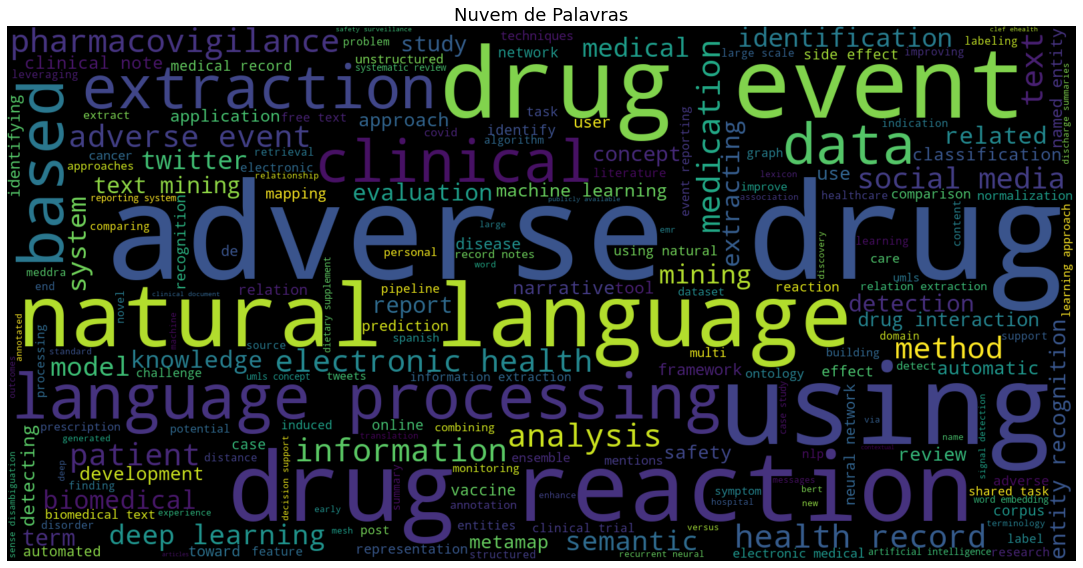

In [154]:
path_image = '../image/'

titulo = 'Nuvem de Palavras'
#eixo_x = ''
#eixo_y = ''
image = path_image+'wordcloud_titulo_bases'
extensao_arquivo = '.pdf'

#Gráfico
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud_titulo_bases, interpolation='bilinear')
ax.set_axis_off()         

#legendas
#ax.legend(title='Legenda', loc=4, fontsize=9)
ax.set_title(titulo, fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)

#salvar imagens
plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.tight_layout() 
plt.show()

#### Nuvem de Palavras dos Títulos em português

In [155]:
stopwords_pt = nltk.corpus.stopwords.words('portuguese')
print(stopwords_pt)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [156]:
palavras_titulo_bases_pt  = df_bases_filtrado['titulo_documento_traduzido'].str.lower()
palavras_titulo_bases_pt

66                                     2018 n2c2 tarefa compartilhada em eventos adversos a medicamentos e extração de medicamentos em registros eletrônicos de saúde 
39                               um estudo comparativo dos sistemas atuais de processamento de linguagem natural clínica ao lidar com abreviações nos resumos de alta 
418                                                                                   um estudo comparativo de n gram e skip gram para extração de conceitos clínicos 
214                                                             uma comparação de técnicas de aprendizado de máquina para detecção de artigos de alvo de medicamentos 
368                                                                     uma revisão abrangente dos métodos computacionais para detecção de interação com medicamentos 
                                                                                    ...                                                                              

In [157]:
wordcloud_palavras_titulo_pt = " ".join(s for s in palavras_titulo_bases_pt)

print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_titulo_bases)} e seu tipo atual é {type(wordcloud_palavras_titulo_bases)}')

wordcloud_titulo_pt = WordCloud(stopwords=stopwords_pt,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_titulo_pt)

Quantidade de palavras no corpus: 49921 e seu tipo atual é <class 'str'>


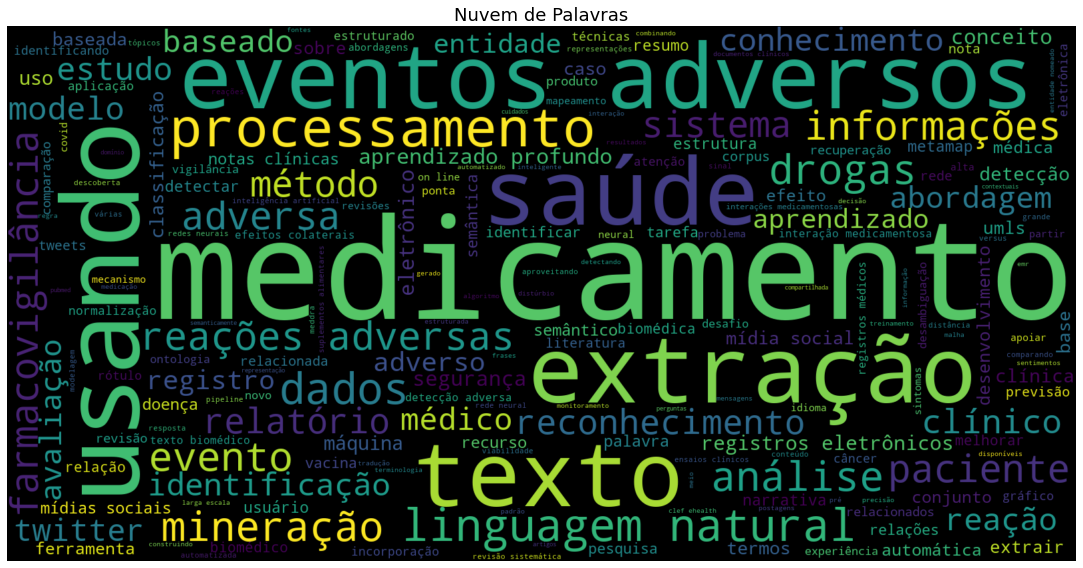

In [158]:
path_image = '../image/'

titulo = 'Nuvem de Palavras'
#eixo_x = ''
#eixo_y = ''
image = path_image+'wordcloud_titulo_pt'
extensao_arquivo = '.pdf'

#Gráfico
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud_titulo_pt, interpolation='bilinear')
ax.set_axis_off()         

#legendas
#ax.legend(title='Legenda', loc=4, fontsize=9)
ax.set_title(titulo, fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)

#salvar imagens
plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.tight_layout() 
plt.show()

#### Nuvem de Palavras dos Resumos em português

## Planilha Bases indexadas filtradas

In [159]:
df_bases_filtrado.columns

Index(['autores_scopus', 'id_autores', 'titulo_documento', 'ano',
       'titulo_fonte', 'volume', 'publicado', 'numero_documento',
       'inicio_pagina', 'fim_pagina', 'quantidade_paginas',
       'quantidade_citacoes', 'doi_scopus', 'link_scopus', 'afiliacoes',
       'autores_com_filiacoes', 'resumo', 'palavras_chaves_autor',
       'palavras_chave_index', 'numeros_sequencia_molecular', 'chemicals_cas',
       'nomes_comerciais', 'fabricantes', 'detalhes_financiamento',
       'texto_financiamento_1', 'texto_financiamento_2',
       'texto_financiamento_3', 'texto_financiamento_4',
       'texto_financiamento_5', 'texto_financiamento_6',
       'texto_financiamento_7', 'texto_financiamento_8',
       'texto_financiamento_9', 'texto_financiamento_10', 'referencias',
       'endereco_correspondencia', 'editores', 'patrocinadores', 'editor',
       'nome_conferencia', 'data_conferencia', 'local_conferencia',
       'codigo_conferencia', 'issn_scopus', 'isbn', 'coden', 'id_pubmed',
   

In [160]:
## Gerar planilha com colunas especificas
#resultado_geral = os.path.join('../data','scopus-31-05-2021.csv')
resultado_dfs = os.path.join('../data','bases_filtradas-resumida-25-06-2022.xlsx')
sheetname="bases_filtradas"

df_xlsx_dfs = pd.DataFrame(df_bases_filtrado, columns = [   
    'eid', 'doi', 'titulo_documento', 'titulo_documento_traduzido',#'titulo_documento_scopus','titulo_documento_scopus_traduzido',
    'ano',
    'palavras_chaves_titulo','quantidade_citacoes',
    'resumo', 'resumo_traduzido_google_translator', 'palavras_chaves_resumo', 'conclusao_traduzida', 
     'quantidade_paginas_','link_scopus', 'editor',
    
    # Conferencia
    'nome_conferencia', 'data_conferencia', 'local_conferencia', 'codigo_conferencia',
    
     'idioma_original', 'tipo_documento', 'acesso_livre', 'fonte', 

       'ano_publicacao_pubmed', 'data_criacao_pubmed',
       'doi_pubmed',
       
    # Campos criados para preenchimento
    'documentos_6+', 'documentos_94+', 'pdf_baixado', 'leitura_resumo','leitura_completa', 
       'conceituar_metamap', 'conceituar_farmacovigilancia', 'conceituar_Reacao_adversa_medicamentos_RAM',
       'conceituar_reconhecimento_entidades_nomeadas_REN', 'conceituar_UMLS',
       'conceituar_metamap_data_file_builder_DFB', 'conceituar_ferramenta_lexicos_LVG', 'conceituar_MetamorphoSys',
       'conceituar_NLP', 'conceituar_outros', 'observacao', 'leitura_conclusao',
       'sincronizado_mendeley', 'data_leitura_resumo', 'data_leitura_completa',   
    ])
df_xlsx_dfs = df_xlsx_dfs.to_excel(resultado_dfs,sheet_name=sheetname,index=False, encoding='utf-8', header=True)

In [161]:
## Gerar planilha com colunas especificas
#resultado_geral = os.path.join('../data','scopus-31-05-2021.csv')
resultado_dfs = os.path.join('../data','bases_filtradas-completa-25-06-2022.xlsx')
sheetname="bases_completa"

df_xlsx_dfs = pd.DataFrame(df_bases_filtrado, columns = [   
'autores_scopus', 'id_autores', 'titulo_documento', 'ano', 'titulo_fonte',
       'volume', 'publicado', 'numero_documento', 'inicio_pagina', 'fim_pagina',
       'quantidade_paginas', 'quantidade_citacoes', 'doi_scopus',
       'link_scopus', 'afiliacoes', 'autores_com_filiacoes', 'resumo',
       'palavras_chaves_autor', 'palavras_chave_index',
       'numeros_sequencia_molecular', 'chemicals_cas', 'nomes_comerciais',
       'fabricantes', 'detalhes_financiamento', 'texto_financiamento_1',
       'texto_financiamento_2', 'texto_financiamento_3',
       'texto_financiamento_4', 'texto_financiamento_5',
       'texto_financiamento_6', 'texto_financiamento_7',
       'texto_financiamento_8', 'texto_financiamento_9',
       'texto_financiamento_10', 'referencias', 'endereco_correspondencia',
       'editores', 'patrocinadores', 'editor', 'nome_conferencia',
       'data_conferencia', 'local_conferencia', 'codigo_conferencia',
       'issn_scopus', 'isbn', 'coden', 'id_pubmed', 'idioma_original',
       'titulo_abreviado_fonte', 'tipo_documento', 'etapa_publicacao',
       'acesso_livre', 'fonte', 'eid', 'doi', 'titulo_documento_scopus',
       'inicio_pagina_', 'fim_pagina_', 'quantidade_paginas_',
       'autores_pubmed', 'citacao_pubmed', 'primeiro_autor_pubmed',
       'jornal_book_pubmed', 'ano_publicacao_pubmed', 'data_criacao_pubmed',
       'id_pmc_pubmed', 'id_nihms_pubmed', 'doi_pubmed',
       'titulo_documento_pubmed', 'documentos_6+', 'documentos_94+',
       'pdf_baixado', 'leitura_resumo', 'leitura_conclusao',
       'leitura_completa', 'resumo_traduzido', 'conclusao_traduzida',
       'conceituar_metamap', 'conceituar_farmacovigilancia',
       'conceituar_Reacao_adversa_medicamentos_RAM',
       'conceituar_reconhecimento_entidades_nomeadas_REN', 'conceituar_UMLS',
       'conceituar_metamap_data_file_builder_DFB',
       'conceituar_ferramenta_lexicos_LVG', 'conceituar_MetamorphoSys',
       'conceituar_NLP', 'conceituar_outros', 'observacao',
       'sincronizado_mendeley', 'data_leitura_resumo', 'data_leitura_completa',
       'palavras_chaves_titulo', 'palavras_chaves_resumo',
       'titulo_documento_scopus_traduzido', 'titulo_documento_pubmed_traduzido',
       'resumo_traduzido_google_translator' 
    ])
df_xlsx_dfs = df_xlsx_dfs.to_excel(resultado_dfs,sheet_name=sheetname,index=False, encoding='utf-8', header=True)

# Curiosidades

**dois documentos?**
<br>

Erratum to: Digital drug safety surveillance: Monitoring pharmaceutical products in Twitter (Drug Safety DOI: 10.1007/s40264-014-0155-x)

<br>

Digital drug safety surveillance: Monitoring pharmaceutical products in Twitter

In [162]:
data_fim = pd.Timestamp.now()

Programa iniciado em: 2022-06-25 02:19:53.695946, e terminado em 2022-06-25 02:33:04.387059. Tempo de -1 days +23:46:49.308887.


In [164]:
print(f'Programa iniciado em: {data_inicio}, e terminado em {data_fim}. Tempo de {data_fim - data_inicio}.')

Programa iniciado em: 2022-06-25 02:19:53.695946, e terminado em 2022-06-25 02:33:04.387059. Tempo de 0 days 00:13:10.691113.


In [163]:
print(f'Shape da planinha: {df_bases_filtrado.shape}')

Shape da planinha: (512, 95)


# Cria arquivo requirements para nova instalação